# 필요한 데이터 로드

In [ ]:
from google.colab import drive

import pandas as pd
import geopandas as gpd

# basepath
dir_path = "/content/drive/MyDrive/2024-02-machine-learning/data"

# mount drive
drive.mount('/content/drive')

# foot traffic file path
foot_traffic_path = f"{dir_path}/foot_traffic_20s_with_centroid.csv"

# foot traffic file path
foot_traffic_path_20_and_30 = f"{dir_path}/foot_traffic_20_and_30_with_centroid.csv"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df_foot_traffic = pd.read_csv(foot_traffic_path)

In [ ]:
df_foot_traffic_20_and_30 = pd.read_csv(foot_traffic_path_20_and_30)

In [ ]:
df_foot_traffic_20 = df_foot_traffic_20_and_30[
 df_foot_traffic_20_and_30['AGRDE_CD'] == 20
]

df_foot_traffic_30 = df_foot_traffic_20_and_30[
 df_foot_traffic_20_and_30['AGRDE_CD'] == 30
]

In [ ]:
df_foot_traffic_20_and_30

,centroid_x,centroid_y,FLPOP_CO,STDR_YM_CD_left,AGRDE_CD
0,127.029251,37.582033,63.42075,201603,20
1,127.029251,37.582033,62.04000,201603,30
2,127.028785,37.581983,43.98150,201603,20
3,127.028785,37.581983,45.14925,201603,30
4,127.029693,37.581905,86.64375,201603,20
...,...,...,...,...,...
184543,127.066500,37.602289,26.09050,201609,30
184544,127.065943,37.602632,14.19440,201609,20
184545,127.065943,37.602632,19.85640,201609,30
184546,127.065709,37.602382,24.32150,201609,20


In [ ]:
df_foot_traffic_20

,centroid_x,centroid_y,FLPOP_CO,STDR_YM_CD_left,AGRDE_CD
0,127.029251,37.582033,63.420750,201603,20
2,127.028785,37.581983,43.981500,201603,20
4,127.029693,37.581905,86.643750,201603,20
6,127.029384,37.581720,51.168600,201603,20
8,127.028990,37.581781,44.571667,201603,20
...,...,...,...,...,...
184538,127.066378,37.602380,4.420000,201609,20
184540,127.066622,37.602370,4.352000,201609,20
184542,127.066500,37.602289,5.372000,201609,20
184544,127.065943,37.602632,14.194400,201609,20


In [ ]:
df_foot_traffic_30

,centroid_x,centroid_y,FLPOP_CO,STDR_YM_CD_left,AGRDE_CD
1,127.029251,37.582033,62.040000,201603,30
3,127.028785,37.581983,45.149250,201603,30
5,127.029693,37.581905,86.172500,201603,30
7,127.029384,37.581720,44.398200,201603,30
9,127.028990,37.581781,42.790333,201603,30
...,...,...,...,...,...
184539,127.066378,37.602380,22.882000,201609,30
184541,127.066622,37.602370,24.165000,201609,30
184543,127.066500,37.602289,26.090500,201609,30
184545,127.065943,37.602632,19.856400,201609,30


# 회의 이후 반영사항

- k-means 가 아니라 DBSCAN 으로 분석해보기
- `TMZONE_CD` 가 0인 값을 골라서 깔끔하게 전체 시간대의 통합 유동인구 가져오기

In [ ]:
df_foot_traffic

,centroid_x,centroid_y,FLPOP_CO,STDR_YM_CD
0,127.029251,37.582033,63.420750,201603
1,127.028785,37.581983,43.981500,201603
2,127.029693,37.581905,86.643750,201603
3,127.029384,37.581720,51.168600,201603
4,127.028990,37.581781,44.571667,201603
...,...,...,...,...
92269,127.066378,37.602380,4.420000,201609
92270,127.066622,37.602370,4.352000,201609
92271,127.066500,37.602289,5.372000,201609
92272,127.065943,37.602632,14.194400,201609


In [ ]:
df_foot_traffic['FLPOP_CO'].describe()

,FLPOP_CO
count,92274.000000
mean,43.894514
std,66.006504
min,0.000000
25%,7.071000
50%,23.875591
75%,52.344000
max,1160.992000


mean 은 43 인데, max 가 1160 인 상황이다. outlier 가 크다는 이야기이다.
outlier 들을 적절하게 처리해보자.

(array([3.0012e+04, 1.5392e+04, 1.1680e+04, 8.8680e+03, 5.7840e+03,
        4.2830e+03, 3.2240e+03, 2.4150e+03, 1.5720e+03, 1.2370e+03,
        9.9800e+02, 9.3600e+02, 7.4800e+02, 5.7700e+02, 5.2500e+02,
        4.3500e+02, 3.9400e+02, 3.7700e+02, 2.4700e+02, 2.3400e+02,
        2.5400e+02, 2.5100e+02, 1.8700e+02, 1.6200e+02, 1.3600e+02,
        9.2000e+01, 1.0300e+02, 1.0200e+02, 1.2400e+02, 7.4000e+01,
        8.5000e+01, 8.2000e+01, 8.9000e+01, 7.8000e+01, 6.6000e+01,
        5.6000e+01, 3.8000e+01, 2.9000e+01, 3.7000e+01, 2.0000e+01,
        2.2000e+01, 3.0000e+01, 1.2000e+01, 2.1000e+01, 1.1000e+01,
        1.9000e+01, 1.1000e+01, 1.0000e+01, 1.8000e+01, 1.6000e+01,
        1.0000e+01, 3.0000e+00, 6.0000e+00, 7.0000e+00, 9.0000e+00,
        7.0000e+00, 3.0000e+00, 4.0000e+00, 4.0000e+00, 1.0000e+01,
        8.0000e+00, 2.0000e+00, 2.0000e+00, 4.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 2.0000e+00, 0.0000e+00,
        0.0000e+00, 2.0000e+00, 0.0000e+00, 0.00

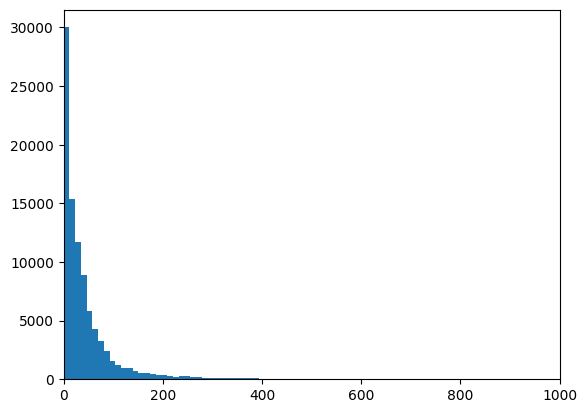

In [ ]:
# draw historgram using df_foot_traffic['FLPOP_CO']

import matplotlib.pyplot as plt

plt.xlim(0, 1_000)
plt.hist(df_foot_traffic['FLPOP_CO'], bins=100)

histogram 으로 그려보아도, 800, 1000, 심지어는 1200 에 가까운 유동인구를 보이는 지점들이 존재한다.

고민을 해 봤는데, IQR 방식은 현재 데이터셋에서 합리적이지 못하다. 이유는, `Q1 - (IQR*1.5)` 를 취한 값이 데이터셋 전체의 최소값보다 적기 때문이다. 그래서 사실상의 lowerbound of outlier 에 걸리는 데이터셋이 존재하지 않는다.

'사람이 어느정도 지나다닌다고 할 수 있는' 그런 기준은 얼마나 될까? 정하기 나름이겠지만, 러프하게 5명은 어떨까? 한 달에 지나다니는 사람이 5명 미만인 거리.

In [ ]:
import numpy as np

# Calculate Q1, Q3, and IQR
Q1 = df_foot_traffic['FLPOP_CO'].quantile(0.25)
Q3 = df_foot_traffic['FLPOP_CO'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
# lower_bound = Q1 - 1.5 * IQR
lower_bound = 5
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df_foot_traffic_no_outliers = df_foot_traffic[
    (df_foot_traffic['FLPOP_CO'] >= lower_bound) &
    (df_foot_traffic['FLPOP_CO'] <= upper_bound)
]

# Print the number of rows before and after removing outliers
print(f"Number of rows before removing outliers: {len(df_foot_traffic)}")
print(f"Number of rows after removing outliers: {len(df_foot_traffic_no_outliers)}")

Number of rows before removing outliers: 92274
Number of rows after removing outliers: 65034


In [ ]:
Q3_20_and_30 = df_foot_traffic_20_and_30['FLPOP_CO'].quantile(0.75)
Q3_20 = df_foot_traffic_20['FLPOP_CO'].quantile(0.75)
Q3_30 = df_foot_traffic_30['FLPOP_CO'].quantile(0.75)

Q1_20_and_30 = df_foot_traffic_20_and_30['FLPOP_CO'].quantile(0.25)
Q1_20 = df_foot_traffic_20['FLPOP_CO'].quantile(0.25)
Q1_30 = df_foot_traffic_30['FLPOP_CO'].quantile(0.25)

IQR_20_and_30 = Q3_20_and_30 - Q1_20_and_30
IQR_20 = Q3_20 - Q1_20
IQR_30 = Q3_30 - Q1_30

upper_bound_20_and_30 = Q3_20_and_30 + IQR_20_and_30 * 1.5
upper_bound_30 = Q3_30 + IQR_30 * 1.5
upper_bound_20 = Q3_20 + IQR_20 * 1.5

df_foot_traffic_20_and_30_larger_than_q3 = df_foot_traffic_20_and_30[
  (df_foot_traffic_20_and_30['FLPOP_CO'] > Q3_20_and_30)
]

df_foot_traffic_20_larger_than_q3 = df_foot_traffic_20[
  (df_foot_traffic_20_and_30['FLPOP_CO'] > Q3_20)
]

df_foot_traffic_30_larger_than_q3 = df_foot_traffic_30[
  (df_foot_traffic_30['FLPOP_CO'] > Q3_30)
]

df_foot_traffic_20_outlier_larger_than_upperbound_IQR = df_foot_traffic_20[
    df_foot_traffic_20['FLPOP_CO'] >= upper_bound_20
]

df_foot_traffic_20_and_30_outlier_larger_than_upperbound_IQR = df_foot_traffic_20_and_30[
    df_foot_traffic_20_and_30['FLPOP_CO'] >= upper_bound_20_and_30
]

df_foot_traffic_30_outlier_larger_than_upperbound_IQR = df_foot_traffic_30[
    df_foot_traffic_30['FLPOP_CO'] >= upper_bound_30
]

<ipython-input-58-34ccdf14faf2>:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_foot_traffic_20_larger_than_q3 = df_foot_traffic_20[


In [ ]:
df_foot_traffic_20_and_30

,centroid_x,centroid_y,FLPOP_CO,STDR_YM_CD_left,AGRDE_CD
0,127.029251,37.582033,63.42075,201603,20
1,127.029251,37.582033,62.04000,201603,30
2,127.028785,37.581983,43.98150,201603,20
3,127.028785,37.581983,45.14925,201603,30
4,127.029693,37.581905,86.64375,201603,20
...,...,...,...,...,...
184543,127.066500,37.602289,26.09050,201609,30
184544,127.065943,37.602632,14.19440,201609,20
184545,127.065943,37.602632,19.85640,201609,30
184546,127.065709,37.602382,24.32150,201609,20


In [ ]:
df_foot_traffic_20_and_30_outlier_larger_than_upperbound_IQR

,centroid_x,centroid_y,FLPOP_CO,STDR_YM_CD_left,AGRDE_CD
309,127.030261,37.578775,131.091500,201603,30
314,127.043390,37.578928,239.153667,201603,20
315,127.043390,37.578928,331.411444,201603,30
365,127.042127,37.578516,176.666909,201603,30
381,127.041575,37.578341,129.591667,201603,30
...,...,...,...,...,...
183097,127.066837,37.603111,149.422000,201605,30
183099,127.066812,37.603031,150.518000,201605,30
183103,127.067121,37.603033,150.518000,201605,30
183176,127.066765,37.602138,127.610200,201605,20


In [ ]:
df_foot_traffic_30_outlier_larger_than_upperbound_IQR

,centroid_x,centroid_y,FLPOP_CO,STDR_YM_CD_left,AGRDE_CD
309,127.030261,37.578775,131.091500,201603,30
315,127.043390,37.578928,331.411444,201603,30
365,127.042127,37.578516,176.666909,201603,30
381,127.041575,37.578341,129.591667,201603,30
385,127.038048,37.578228,210.612200,201603,30
...,...,...,...,...,...
182605,127.066765,37.602138,152.255800,201604,30
183097,127.066837,37.603111,149.422000,201605,30
183099,127.066812,37.603031,150.518000,201605,30
183103,127.067121,37.603033,150.518000,201605,30


In [ ]:
df_foot_traffic_20_outlier_larger_than_upperbound_IQR

,centroid_x,centroid_y,FLPOP_CO,STDR_YM_CD_left,AGRDE_CD
314,127.043390,37.578928,239.153667,201603,20
364,127.042127,37.578516,122.429091,201603,20
384,127.038048,37.578228,136.500800,201603,20
444,127.040369,37.578321,170.121000,201603,20
480,127.036446,37.578000,232.512500,201603,20
...,...,...,...,...,...
179056,127.056341,37.591323,317.364250,201606,20
181214,127.066765,37.602138,134.946200,201603,20
181531,127.067405,37.601001,120.890000,201611,20
182604,127.066765,37.602138,129.629800,201604,20


In [ ]:
df_foot_traffic_outlier_20s_and_30s = df_foot_traffic_20_and_30_outlier_larger_than_upperbound_IQR.groupby(['centroid_x', 'centroid_y'])[['FLPOP_CO']].mean()

In [ ]:
df_foot_traffic_outlier_20s_and_30s.reset_index(inplace=True)

In [ ]:
df_foot_traffic_outlier_20s_and_30s

,centroid_x,centroid_y,FLPOP_CO
0,127.022327,37.575227,290.846616
1,127.022899,37.574500,338.293573
2,127.022932,37.575921,302.181640
3,127.022953,37.573034,156.816397
4,127.023221,37.576057,303.548593
...,...,...,...
1303,127.074149,37.572168,280.746950
1304,127.074413,37.571814,200.662342
1305,127.074662,37.572824,136.800400
1306,127.074888,37.572113,168.260057


In [ ]:
df_foot_traffic_outlier_20s = df_foot_traffic_20_outlier_larger_than_upperbound_IQR.groupby(['centroid_x', 'centroid_y'])[['FLPOP_CO']].mean()
df_foot_traffic_outlier_20s.reset_index(inplace=True)

df_foot_traffic_outlier_20s

,centroid_x,centroid_y,FLPOP_CO
0,127.022327,37.575227,244.374276
1,127.022899,37.574500,283.350103
2,127.022932,37.575921,256.250330
3,127.022953,37.573034,162.144286
4,127.023221,37.576057,253.580629
...,...,...,...
940,127.073324,37.572229,229.029738
941,127.073876,37.572533,185.598187
942,127.074020,37.571513,146.847000
943,127.074149,37.572168,229.300000


In [ ]:
df_foot_traffic_outlier_30s = df_foot_traffic_30_outlier_larger_than_upperbound_IQR.groupby(['centroid_x', 'centroid_y'])[['FLPOP_CO']].mean()
df_foot_traffic_outlier_30s.reset_index(inplace=True)

df_foot_traffic_outlier_30s

,centroid_x,centroid_y,FLPOP_CO
0,127.022327,37.575227,337.318957
1,127.022899,37.574500,393.237043
2,127.022932,37.575921,348.112950
3,127.022953,37.573034,156.150411
4,127.023221,37.576057,353.516557
...,...,...,...
939,127.074149,37.572168,311.615120
940,127.074413,37.571814,227.695437
941,127.074662,37.572824,136.800400
942,127.074888,37.572113,168.260057


In [ ]:
print(f"IQR(Interquantile): {IQR}")
print(f"Q1: {Q1}")
print(f"Lower bound: {lower_bound}")
print(f"Upper bound: {upper_bound}")
print(f"Min: {df_foot_traffic['FLPOP_CO'].min()}")
print(f"Max: {df_foot_traffic['FLPOP_CO'].max()}")

IQR(Interquantile): 45.273
Q1: 7.071
Lower bound: 5
Upper bound: 120.2535
Min: 0.0
Max: 1160.992


2024-12-12 회의 이후 든 생각을 반영해보았다.
유동인구가 적은 곳을 고려하는 것보단, 유동인구가 많은 곳을 고려하는 게 더 합리적이다.
그래서, Q3 보다 큰 값들만을 추렸을 때 분포가 어떻게 나오는지를 확인해봐야겠다.

In [ ]:
# take FLPOP_CO is larger than Q3

df_foot_traffic_larger_than_q3 = df_foot_traffic[
    (df_foot_traffic['FLPOP_CO'] > Q3)
]

In [ ]:
df_foot_traffic_larger_than_q3

,centroid_x,centroid_y,FLPOP_CO,STDR_YM_CD
0,127.029251,37.582033,63.420750,201603
2,127.029693,37.581905,86.643750,201603
5,127.029736,37.581647,71.028500,201603
68,127.030015,37.580054,54.717000,201603
74,127.029919,37.579888,67.385333,201603
...,...,...,...,...
92245,127.062262,37.602997,80.143000,201609
92246,127.062856,37.603155,54.193667,201609
92247,127.062703,37.602992,55.441000,201609
92248,127.063009,37.602988,53.693500,201609


(array([4.591e+03, 3.815e+03, 2.651e+03, 2.014e+03, 1.326e+03, 1.107e+03,
        9.260e+02, 8.740e+02, 7.130e+02, 5.300e+02, 5.030e+02, 4.150e+02,
        3.790e+02, 3.550e+02, 2.580e+02, 2.140e+02, 2.400e+02, 2.340e+02,
        2.190e+02, 1.610e+02, 1.430e+02, 9.800e+01, 1.010e+02, 1.070e+02,
        9.600e+01, 1.030e+02, 7.000e+01, 8.200e+01, 7.300e+01, 8.500e+01,
        7.900e+01, 6.100e+01, 5.100e+01, 3.700e+01, 2.900e+01, 3.600e+01,
        1.800e+01, 2.000e+01, 3.400e+01, 1.000e+01, 1.800e+01, 1.200e+01,
        2.300e+01, 7.000e+00, 1.300e+01, 1.200e+01, 1.900e+01, 6.000e+00,
        1.100e+01, 2.000e+00, 8.000e+00, 5.000e+00, 1.100e+01, 5.000e+00,
        3.000e+00, 4.000e+00, 4.000e+00, 1.000e+01, 6.000e+00, 4.000e+00,
        2.000e+00, 4.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 2.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 2.000e+00, 0.000e+0

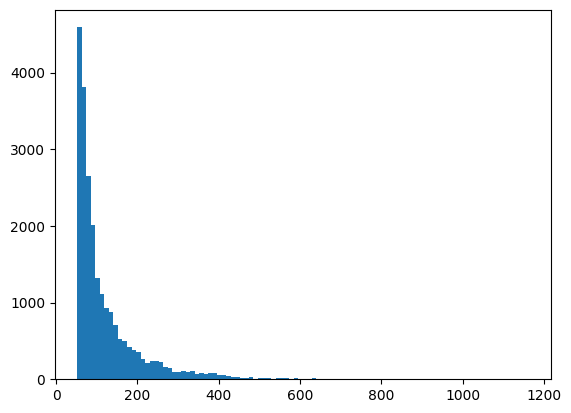

In [ ]:
import matplotlib.pyplot as plt

plt.hist(df_foot_traffic_larger_than_q3['FLPOP_CO'], bins=100)

(array([1759., 1787., 1782., 1782., 1795., 1762., 1719., 1647., 1557.,
        1571., 1515., 1516., 1524., 1409., 1364., 1344., 1278., 1284.,
        1260., 1138., 1140., 1062., 1108., 1124., 1108., 1060.,  953.,
        1087.,  958.,  929.,  873.,  869.,  827.,  825.,  715.,  713.,
         667.,  675.,  653.,  607.,  581.,  583.,  479.,  532.,  485.,
         485.,  443.,  442.,  413.,  468.,  404.,  459.,  462.,  403.,
         393.,  379.,  365.,  373.,  416.,  352.,  299.,  273.,  310.,
         303.,  270.,  254.,  254.,  314.,  262.,  244.,  249.,  200.,
         229.,  212.,  193.,  225.,  221.,  186.,  185.,  159.,  170.,
         142.,  144.,  112.,  121.,  163.,  116.,  131.,  148.,  106.,
         126.,  128.,  124.,   99.,  112.,  146.,  111.,   95.,  114.,
         121.]),
 array([  5.00166667,   6.154035  ,   7.30640333,   8.45877167,
          9.61114   ,  10.76350833,  11.91587667,  13.068245  ,
         14.22061333,  15.37298167,  16.52535   ,  17.67771833,
         1

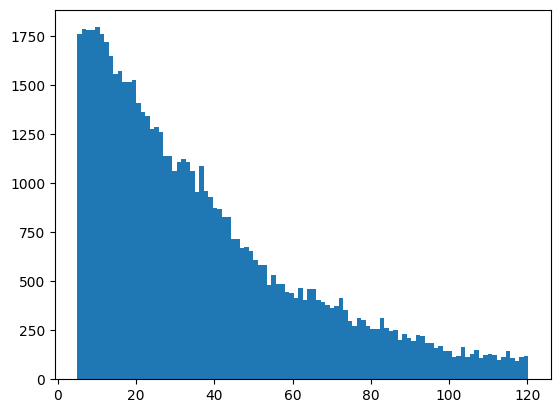

In [ ]:
import matplotlib.pyplot as plt

plt.hist(df_foot_traffic_no_outliers['FLPOP_CO'], bins=100)

In [ ]:
# get outliers
df_foot_traffic_outliers_larger_than_upperbound = df_foot_traffic[
    (df_foot_traffic['FLPOP_CO'] > upper_bound)
]

df_foot_traffic_outliers_lower_than_lowerbound = df_foot_traffic[
    (df_foot_traffic['FLPOP_CO'] < 5)
]


In [ ]:
df_foot_traffic_outliers_lower_than_lowerbound

,centroid_x,centroid_y,FLPOP_CO,STDR_YM_CD
7,127.031928,37.581371,7.355333,201603
18,127.031676,37.581186,5.737000,201603
19,127.030715,37.580959,9.244000,201603
32,127.030619,37.580769,4.445000,201603
37,127.026955,37.580731,4.468500,201603
...,...,...,...,...
92265,127.066140,37.602530,0.544000,201609
92268,127.066502,37.602461,8.040000,201609
92269,127.066378,37.602380,4.420000,201609
92270,127.066622,37.602370,4.352000,201609


uppperbound 를 넘어가는 outlier 들 7400건은 따로 처리하도록 하자.

In [ ]:
df_foot_traffic_outliers_larger_than_upperbound

,centroid_x,centroid_y,FLPOP_CO,STDR_YM_CD
157,127.043390,37.578928,239.153667,201603
182,127.042127,37.578516,122.429091,201603
192,127.038048,37.578228,136.500800,201603
222,127.040369,37.578321,170.121000,201603
240,127.036446,37.578000,232.512500,201603
...,...,...,...,...
89528,127.056341,37.591323,317.364250,201606
90607,127.066765,37.602138,134.946200,201603
90765,127.067405,37.601001,120.890000,201611
91302,127.066765,37.602138,129.629800,201604


In [ ]:
import geopandas as gpd
from shapely.geometry import Point

gdf_foot_traffic_outliers = gpd.GeoDataFrame(
    df_foot_traffic_outlier_30s['FLPOP_CO'],
    geometry=gpd.points_from_xy(
        df_foot_traffic_outlier_30s['centroid_x'],
        df_foot_traffic_outlier_30s['centroid_y']
    ),
    crs='EPSG:4326',
)

gdf_foot_traffic_outliers.to_file(
    f"{dir_path}/foot_traffic_outliers_30s.geojson",
    driver='GeoJSON'
)

gdf_foot_traffic_outliers

,FLPOP_CO,geometry
0,337.318957,POINT (127.02233 37.57523)
1,393.237043,POINT (127.0229 37.5745)
2,348.112950,POINT (127.02293 37.57592)
3,156.150411,POINT (127.02295 37.57303)
4,353.516557,POINT (127.02322 37.57606)
...,...,...
939,311.615120,POINT (127.07415 37.57217)
940,227.695437,POINT (127.07441 37.57181)
941,136.800400,POINT (127.07466 37.57282)
942,168.260057,POINT (127.07489 37.57211)


(array([839., 813., 656., 524., 487., 401., 372., 334., 292., 191., 227.,
        217., 227., 170., 147., 130.,  90.,  94., 102.,  77., 115.,  58.,
         79.,  76.,  84.,  70.,  60.,  55.,  42.,  36.,  24.,  33.,  16.,
         18.,  34.,   7.,  18.,  12.,  19.,  13.,   8.,   9.,  16.,  15.,
          7.,   7.,   4.,   6.,   5.,  12.,   4.,   3.,   4.,   4.,   8.,
          4.,   8.,   0.,   4.,   2.,   0.,   0.,   0.,   0.,   2.,   0.,
          0.,   0.,   2.,   0.,   0.,   0.,   2.,   0.,   0.,   0.,   0.,
          0.,   2.,   0.,   0.,   2.,   0.,   0.,   0.,   4.,   2.,   2.,
          0.,   0.,   2.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          2.]),
 array([ 120.254  ,  130.66138,  141.06876,  151.47614,  161.88352,
         172.2909 ,  182.69828,  193.10566,  203.51304,  213.92042,
         224.3278 ,  234.73518,  245.14256,  255.54994,  265.95732,
         276.3647 ,  286.77208,  297.17946,  307.58684,  317.99422,
         328.4016 ,  338.80898,  349.21636,  3

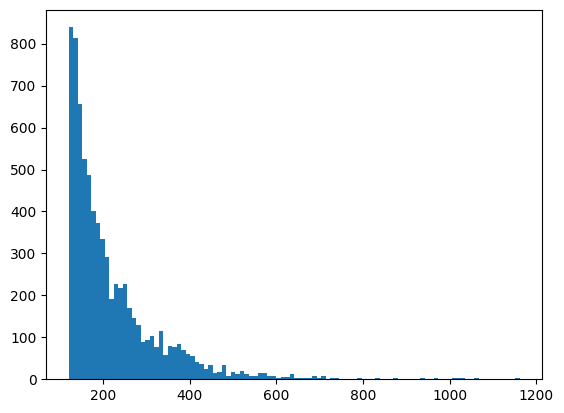

In [ ]:
plt.hist(df_foot_traffic_outliers_larger_than_upperbound['FLPOP_CO'], bins=100)

0이 여전히 많긴 하지만, 그래도 outlier 들이 어느정도 잡힌 상황이다. 0이 많은 건 scaler 로 처리해두로록 하자.

# DBSCAN 의 hyperparameter tuning

## DBSCAN 에서 왜 hyper parameter tuning 이 중요한가
- dbscan 은 별도의 cluster number 를 지정해 줄 필요가 없다는 장점이 있지만, 이웃들의 범위를 지정하는 `eps(epsilon)` 와 몇 개의 이웃이 cluster 안에 속해야 cluster 로 정의할지를 정하는 `min_samples` 라는 hyper parameter 의 영향을 아주 많이 받는다.

## min_samples
- 일단 `min_samples` 은 시발점을 $dimensionality \ of \ data + 1$ 로 잡는 것이 좋다.
  - 현재 학습시키는 공간데이터의 경우 유동인구는 가중치로 빠지기에 x, y 만을 고려한다고 치면 2개의 차원이고, 2+1 을 해서 3으로 초기값을 잡는 것이 좋다.
- 물론 좀 더 밀도 있게 만들고 싶다면, 초기값을 늘려도 무방하다만 고차원 데이터의 경우 `min_samples` 를 함부로 늘리는 건 차원의 저주(curse of dimensionality)를 유발할 수 있으니 주의하자.

## eps
- `min_sample` 이 정해진 뒤로는 `k-Distance plot` 을 사용한다. 그러니까, 각 지점마다 k 번째로 가까운 이웃의 거리를 구한다.

## 추가적인 고민
- 그러나 나는 scaler 로 처리한 인구밀도를 가중치로 사용하고 있는 상황이다. 이웃간의 거리를 구하는 과정에서는 가중치를 도입하기 어려워 가중치가 아니라 하나의 feature 로 사용하게 되는데, 이렇게 되면 의미가 달라질 수 있다.
- 그래서 그냥 hyperparameter 를 바꾸어 가면서 DBSCAN clsuter 를 greedy 하게 만들고, silhouette score 가 높은 것을 찾는 방법을 선택하도록 하자.
  - 그리고 이 과정에서 데이터 전체를 학습시키는 건 시간이 많이 걸리고 메모리도 많이 먹어 종종 분석환경이 종료되는 상황이 발생하기에 1개의 월 데이터만을 통해 처리하도록 하자.

In [ ]:
df_foot_traffic_sample_for_tuning = df_foot_traffic_no_outliers[
    df_foot_traffic_no_outliers['STDR_YM_CD'] == 201603
][['centroid_x', 'centroid_y', 'FLPOP_CO']]

df_foot_traffic_sample_for_tuning

,centroid_x,centroid_y,FLPOP_CO
0,127.029251,37.582033,63.420750
1,127.028785,37.581983,43.981500
2,127.029693,37.581905,86.643750
3,127.029384,37.581720,51.168600
4,127.028990,37.581781,44.571667
...,...,...,...
90638,127.066885,37.602360,102.002350
90639,127.066966,37.601810,89.574200
90640,127.065980,37.601678,79.077000
90641,127.062057,37.601619,36.715000


centroid_x, centroid_y 로 groupby 를 시킨 뒤 FLPOP_CO 의 mean 을 계산한 값과도 비교해보자.

In [ ]:
df_foot_traffic_mean = df_foot_traffic_no_outliers.groupby(
    ['centroid_x', 'centroid_y']
)[['FLPOP_CO']].mean().reset_index()

df_foot_traffic_mean

,centroid_x,centroid_y,FLPOP_CO
0,127.022953,37.573034,83.172254
1,127.022955,37.572422,50.330808
2,127.023285,37.576446,103.984000
3,127.023336,37.572686,76.620810
4,127.023473,37.577370,41.273494
...,...,...,...
6890,127.076333,37.572005,7.940250
6891,127.076770,37.571632,10.354375
6892,127.076833,37.573855,10.048100
6893,127.076878,37.572313,8.720278


In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

def generate_weighted_dbscan_cluster(dataframe, eps=0.5956, min_samples=15):
  scaler = StandardScaler()
  scaled_df = scaler.fit_transform(dataframe)

  dbscan = DBSCAN(eps=eps, min_samples=min_samples)

  clustering_result = dbscan.fit(
      X=scaled_df[:, :2], # scaled x, y coordinate
      sample_weight=scaled_df[:, 2] # scaled foot traffic
  )

  return (clustering_result, scaled_df)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


def visualize_dbscan_cluster(clustering_result, data_scaled, eps, min_samples, datasource_title):
  labels = clustering_result.labels_
  unique_labels = set(labels)

  colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

  plt.figure(figsize=(12, 8))

  for label, color in zip(unique_labels, colors):
      if label == -1:
          # Noise points
          color = [0, 0, 0, 1]  # Black for noise
          label_name = "Noise"
      else:
          label_name = f"Cluster {label}"

      # Mask data points for the current label
      class_members = (labels == label)
      xy = data_scaled[class_members, :2]  # Select first 2 columns for x, y

      # Plot points
      plt.scatter(
          xy[:, 0],
          xy[:, 1],
          c=[tuple(color)],
          label=label_name,
          edgecolor='k',
          s=20
      )

  # Add titles, labels, and legend
  plt.title(f'DBSCAN Clustering Result using {datasource_title} (eps={eps}, min_samples={min_samples})', fontsize=16)
  plt.xlabel('Feature 1 (scaled)', fontsize=12)
  plt.ylabel('Feature 2 (scaled)', fontsize=12)
  plt.legend(loc='best', fontsize=10)
  plt.grid(True)
  plt.show()

In [ ]:
def draw_dbscan(
    dataframe,
    datasource_title,
    eps=0.5956,
    min_samples=15
):
  dbscan_result, data_scaled = generate_weighted_dbscan_cluster(
      dataframe,
      eps=eps,
      min_samples=min_samples,
  )

  visualize_dbscan_cluster(dbscan_result, data_scaled, eps, min_samples, datasource_title)

In [ ]:
# df_foot_traffic_20_and_30_larger_than_q3
# df_foot_traffic_20_larger_than_q3
# df_foot_traffic_30_larger_than_q3

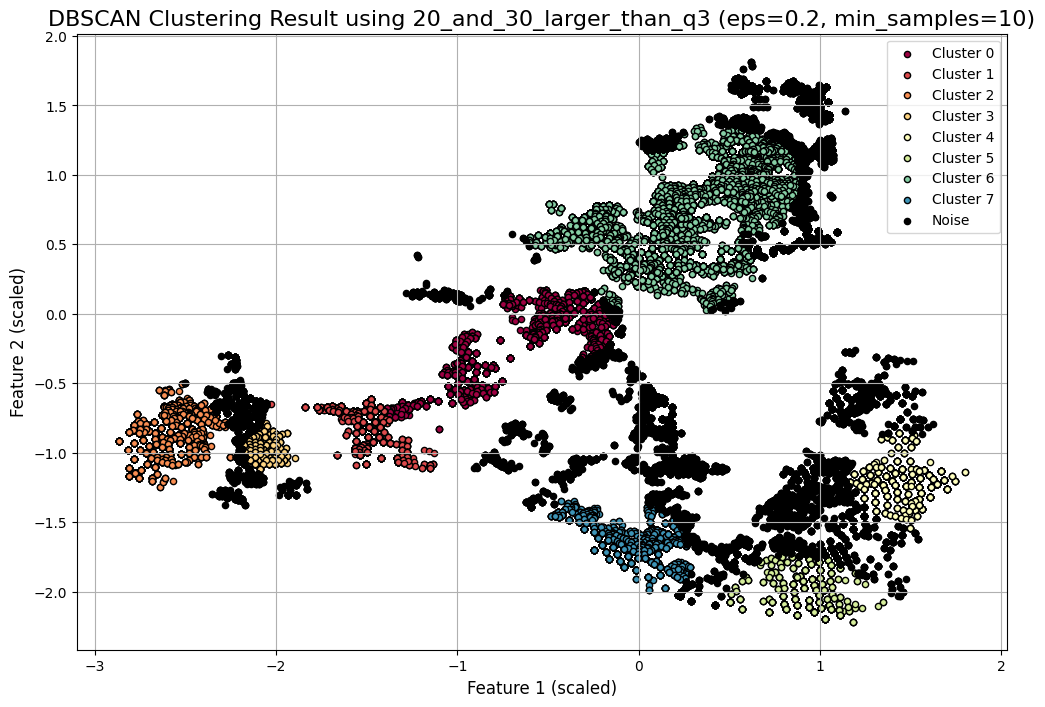

In [ ]:
draw_dbscan(df_foot_traffic_20_and_30_larger_than_q3, eps=0.20, min_samples=10, datasource_title="20_and_30_larger_than_q3")

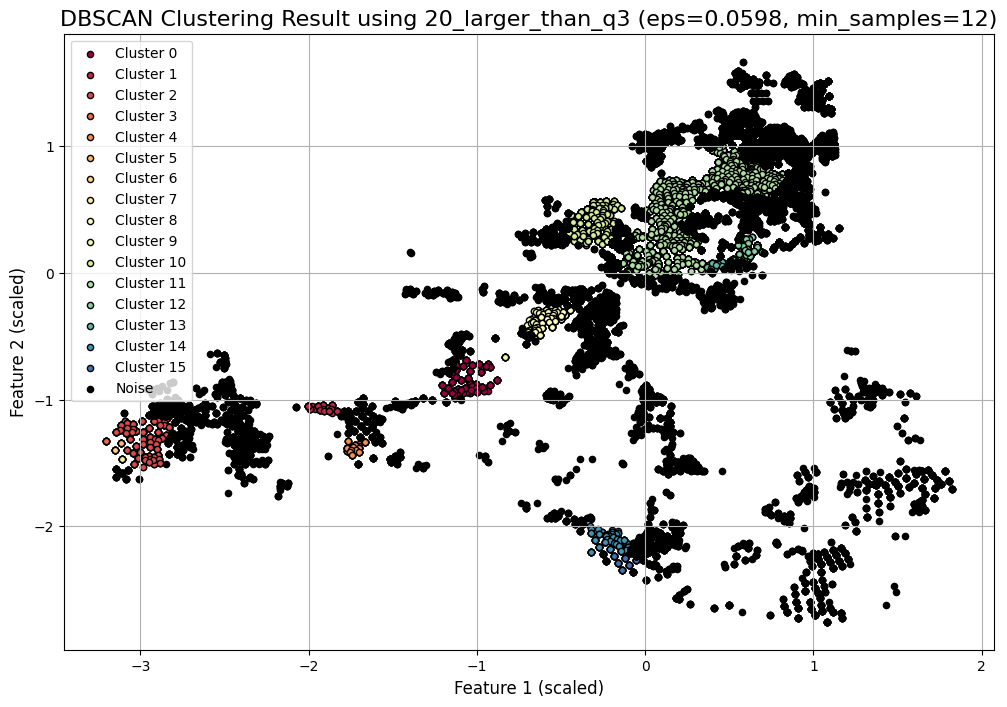

In [ ]:
draw_dbscan(df_foot_traffic_20_larger_than_q3, eps=0.0598, min_samples=12, datasource_title="20_larger_than_q3")

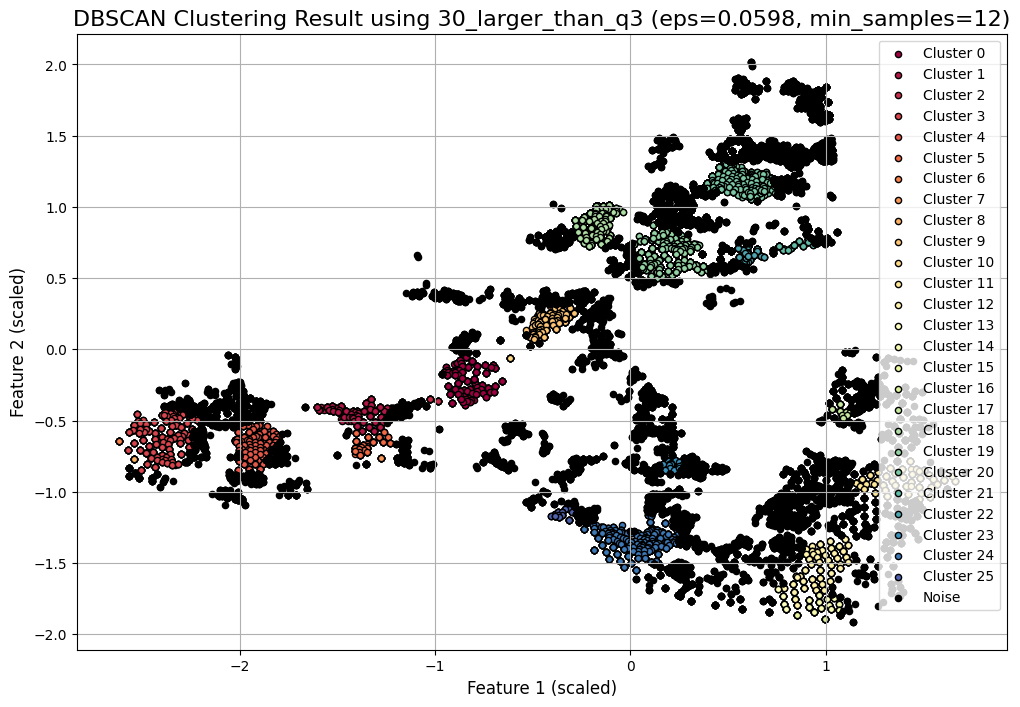

In [ ]:
draw_dbscan(df_foot_traffic_30_larger_than_q3, eps=0.0598, min_samples=12, datasource_title="30_larger_than_q3")

In [ ]:
# df_foot_traffic_20_and_30_larger_than_q3
# df_foot_traffic_20_larger_than_q3
# df_foot_traffic_30_larger_than_q3

dbscan_result, scaled_df = generate_weighted_dbscan_cluster(
    df_foot_traffic_30_larger_than_q3, eps=0.0598, min_samples=3
)

In [ ]:
df_foot_traffic_larger_than_q3_with_cluster_id = df_foot_traffic_30_larger_than_q3.copy()
df_foot_traffic_larger_than_q3_with_cluster_id['cluster_id'] = dbscan_result.labels_

df_foot_traffic_larger_than_q3_with_cluster_id = df_foot_traffic_larger_than_q3_with_cluster_id[[
    'centroid_x',
    'centroid_y',
    'FLPOP_CO',
    'cluster_id'
]]

df_foot_traffic_larger_than_q3_with_cluster_id

,centroid_x,centroid_y,FLPOP_CO,cluster_id
1,127.029251,37.582033,62.040000,-1
5,127.029693,37.581905,86.172500,-1
11,127.029736,37.581647,74.084000,-1
149,127.029919,37.579888,67.174667,-1
151,127.029730,37.579824,64.736000,-1
...,...,...,...,...
184487,127.067121,37.603033,99.843000,-1
184489,127.062479,37.603259,64.899200,-1
184491,127.062262,37.602997,67.005000,-1
184495,127.062703,37.602992,58.691000,-1


In [ ]:
!pip install alphashape

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 543.2/543.2 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 704.8/704.8 kB 5.1 MB/s eta 0:00:00


In [ ]:
cluster_rows = []

import alphashape as ashp
import geopandas as gpd
from shapely.geometry import LineString

# Group by cluster to create LineString for each cluster
for cluster in df_foot_traffic_larger_than_q3_with_cluster_id['cluster_id'].unique():
    if cluster == -1:  # Skip noise
        continue

    cluster_data = df_foot_traffic_larger_than_q3_with_cluster_id[
      df_foot_traffic_larger_than_q3_with_cluster_id['cluster_id'] == cluster
    ]

    coords = list(zip(cluster_data['centroid_x'], cluster_data['centroid_y']))

    # case handling - if there are no subsiquent points for drawing concave hull, skip
    if len(set(coords)) >= 3:
      concave_hull = ashp.alphashape(coords, alpha=500)

    else:
      concave_hull = LineString(coords)

    cluster_rows.append({'cluster': cluster, 'geometry': concave_hull})

# Step 5: Create LineString geometries by cluster
gdf_clusters = gpd.GeoDataFrame(cluster_rows, columns=['cluster', 'geometry'])

In [ ]:
gdf_clusters[
    gdf_clusters['geometry'].is_empty == False
]

,cluster,geometry
0,0,"POLYGON ((127.04328 37.57957, 127.04292 37.580..."
1,1,"POLYGON ((127.04158 37.57834, 127.04213 37.578..."
2,2,"POLYGON ((127.03586 37.57798, 127.03645 37.578..."
3,3,"POLYGON ((127.02665 37.57743, 127.0273 37.5768..."
4,4,"POLYGON ((127.03132 37.5768, 127.03176 37.5764..."
5,5,"LINESTRING (127.02233 37.57523, 127.02233 37.5..."
6,6,"POLYGON ((127.0408 37.57332, 127.04045 37.5734..."
7,7,"LINESTRING (127.039 37.57384, 127.039 37.57384..."
8,8,"LINESTRING (127.0233 37.57376, 127.0233 37.573..."
9,9,"LINESTRING (127.03803 37.57337, 127.03803 37.5..."


<Axes: >

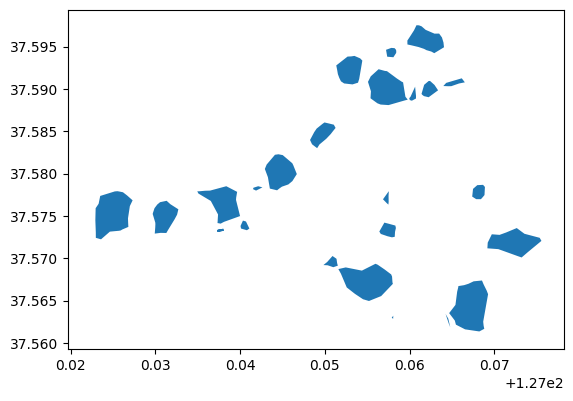

In [ ]:
gdf_clusters.plot()

In [ ]:
gdf_clusters.set_crs('EPSG:4326', inplace=True)

gdf_clusters.to_file(
    f"{dir_path}/dbscaned_foot_traffic_clusters_30_larger_than_q3.geojson",
    driver='GeoJSON',
)

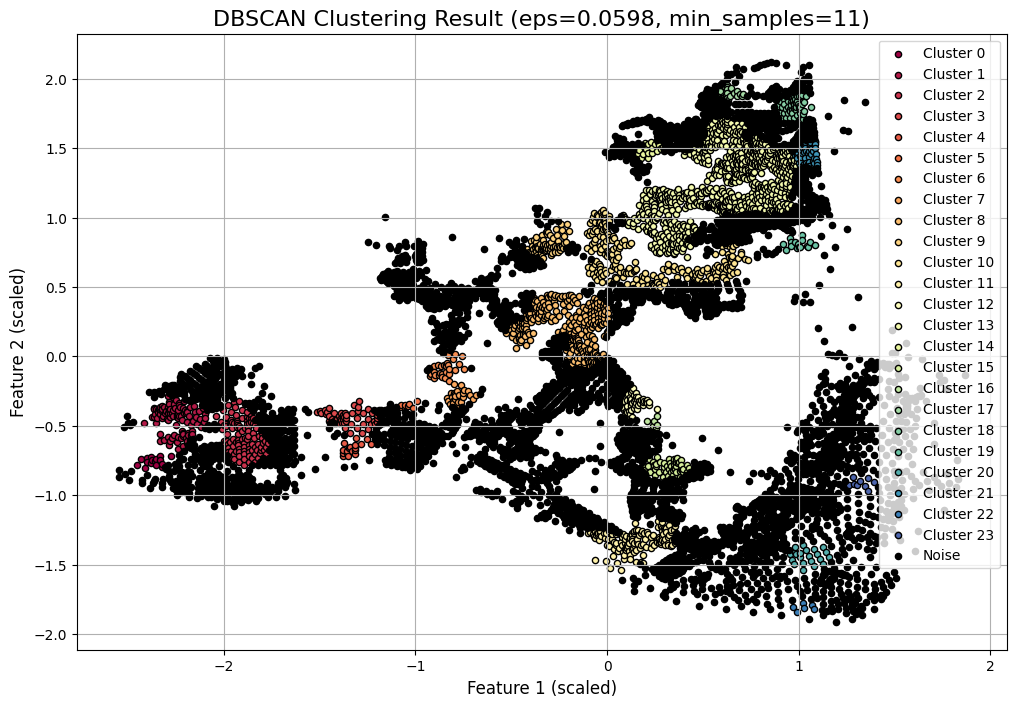

In [ ]:
draw_dbscan(df_foot_traffic_mean, eps=0.0598, min_samples=11)

In [ ]:
# draw dbscan plot

import matplotlib.pyplot as plt



In [ ]:
from sklearn.preprocessing import StandardScaler

# Step 1: Scale the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df_foot_traffic_sample_for_tuning)

data_scaled

array([[-2.24004563, -0.20661095,  0.78415835],
       [-2.27963819, -0.21084185,  0.13890744],
       [-2.2025011 , -0.21744442,  1.55500403],
       ...,
       [ 0.88075044,  1.45927053,  1.30383939],
       [ 0.54745818,  1.45426004, -0.10229094],
       [ 1.12999285,  1.19663463, -1.14372503]])

- eps 는 [0.1, 1.0], min_samples 는 [1, 20] 으로 놓고 각 combination 으로 silhouette score 를 그려보았을 때, 0.6, 15 의 조합이 0.315 로 가장 좋은 조합이 나왔다.
- 그렇다면, min_samples 는 15로 고정 후, eps 의 범위를 [0.6, 0.7] 로 두고 0.01 단위로 결과를 확인해보자.

eps: 0.6, min_samples: 15, silhouette score: 0.3152044929315679
eps: 0.61, min_samples: 15, silhouette score: 0.3159114436168041
eps: 0.62, min_samples: 15, silhouette score: 0.3146641326791682
eps: 0.63, min_samples: 15, silhouette score: 0.3089129446332266
eps: 0.64, min_samples: 15, silhouette score: 0.3079759464595518
eps: 0.65, min_samples: 15, silhouette score: 0.3058439164625776
eps: 0.66, min_samples: 15, silhouette score: 0.30338867935042924
eps: 0.67, min_samples: 15, silhouette score: 0.3039697099967512
eps: 0.68, min_samples: 15, silhouette score: 0.29912260672661123
eps: 0.6900000000000001, min_samples: 15, silhouette score: 0.2951773360778157
Best eps: 0.61, Best min_samples: 15, Best silhouette score: 0.3159114436168041


<ipython-input-15-33ca6ad92ea8>:41: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  plt.imshow(


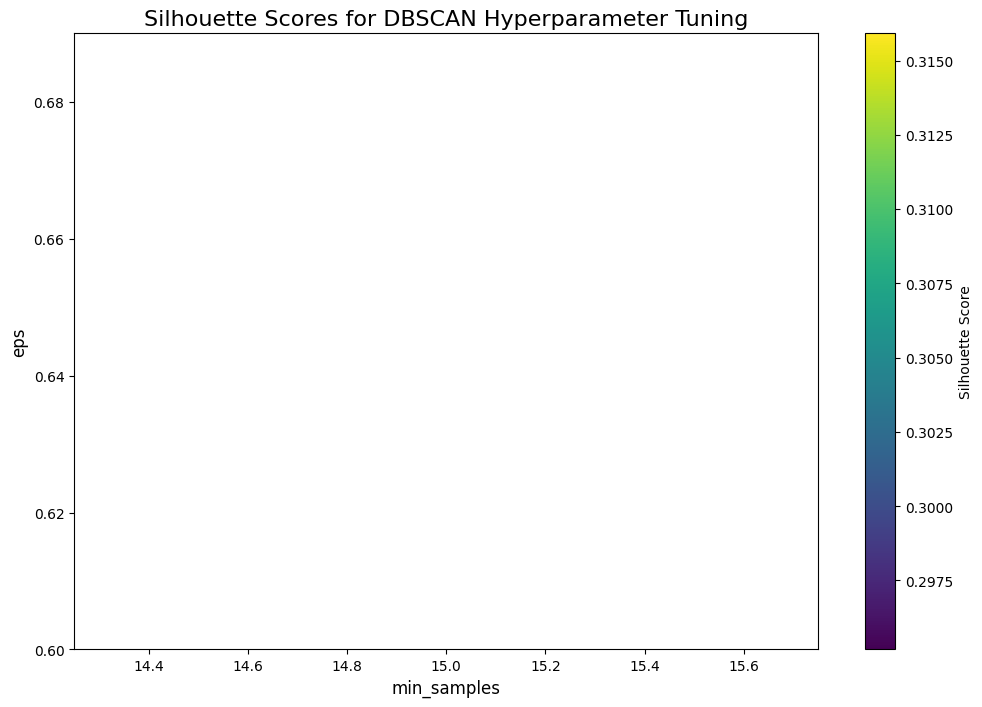

In [ ]:
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Step 2: Define ranges for eps and min_samples
eps_values = np.arange(0.6, 0.7, 0.01)
min_samples_values = range(15, 16)

# Initialize storage for silhouette scores
heatmap_scores = np.full((len(eps_values), len(min_samples_values)), -1.0)

best_score = -1  # Initialize best silhouette score
best_params = None  # To store best parameters

# Step 3: Iterate over eps and min_samples
for i, eps in enumerate(eps_values):
    for j, min_samples in enumerate(min_samples_values):
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(
            X=data_scaled[:, :2],  # Assuming first two columns are coordinates
            sample_weight=data_scaled[:, 2]  # Third column is sample weights
        )

        # Ignore configurations with all points as noise
        if len(set(labels)) > 1:  # At least 2 clusters
            score = silhouette_score(data_scaled, labels)
            heatmap_scores[i, j] = score  # Store silhouette score
            print(f"eps: {eps}, min_samples: {min_samples}, silhouette score: {score}")

            # Update best parameters if current score is better
            if score > best_score:
                best_score = score
                best_params = (eps, min_samples)

# Step 4: Print best parameters
print(f"Best eps: {best_params[0]}, Best min_samples: {best_params[1]}, Best silhouette score: {best_score}")

# Step 5: Visualize the result as a heatmap
plt.figure(figsize=(12, 8))
plt.imshow(
    heatmap_scores,
    interpolation='nearest',
    cmap='viridis',
    aspect='auto',
    extent=[
        min(min_samples_values), max(min_samples_values),
        max(eps_values), min(eps_values)
    ]
)
plt.colorbar(label='Silhouette Score')
plt.title('Silhouette Scores for DBSCAN Hyperparameter Tuning', fontsize=16)
plt.xlabel('min_samples', fontsize=12)
plt.ylabel('eps', fontsize=12)
plt.gca().invert_yaxis()  # Ensure eps values decrease top to bottom
plt.show()

> Best eps: 0.61, Best min_samples: 15, Best silhouette score: 0.3159114436168041

계속해서, [0.59, 0.61] 의 범위에서 step 을 0.001 로 확인해보자.

eps: 0.59, min_samples: 15, silhouette score: 0.3149380430070908
eps: 0.591, min_samples: 15, silhouette score: 0.3146983229265718
eps: 0.592, min_samples: 15, silhouette score: 0.31464097492089405
eps: 0.593, min_samples: 15, silhouette score: 0.3152128917664701
eps: 0.594, min_samples: 15, silhouette score: 0.3160693777417618
eps: 0.595, min_samples: 15, silhouette score: 0.3163635859818238
eps: 0.596, min_samples: 15, silhouette score: 0.3165326833730583
eps: 0.597, min_samples: 15, silhouette score: 0.3153468398722344
eps: 0.598, min_samples: 15, silhouette score: 0.3161507586572144
eps: 0.599, min_samples: 15, silhouette score: 0.31611344754481224
eps: 0.6, min_samples: 15, silhouette score: 0.3152044929315679
eps: 0.601, min_samples: 15, silhouette score: 0.31406629415257536
eps: 0.602, min_samples: 15, silhouette score: 0.3139780831333577
eps: 0.603, min_samples: 15, silhouette score: 0.31414658402612183
eps: 0.604, min_samples: 15, silhouette score: 0.31418574174053204
eps: 0.6

<ipython-input-16-a1879f9d23cd>:41: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  plt.imshow(


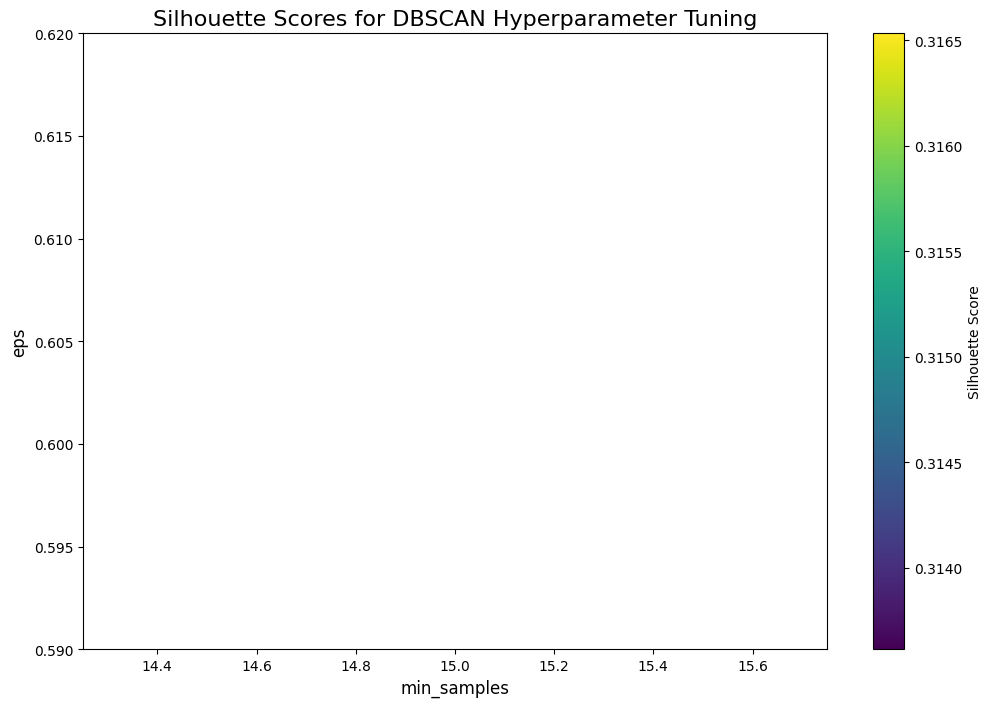

In [ ]:
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Step 2: Define ranges for eps and min_samples
eps_values = np.arange(0.59, 0.62, 0.001)
min_samples_values = range(15, 16)

# Initialize storage for silhouette scores
heatmap_scores = np.full((len(eps_values), len(min_samples_values)), -1.0)

best_score = -1  # Initialize best silhouette score
best_params = None  # To store best parameters

# Step 3: Iterate over eps and min_samples
for i, eps in enumerate(eps_values):
    for j, min_samples in enumerate(min_samples_values):
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(
            X=data_scaled[:, :2],  # Assuming first two columns are coordinates
            sample_weight=data_scaled[:, 2]  # Third column is sample weights
        )

        # Ignore configurations with all points as noise
        if len(set(labels)) > 1:  # At least 2 clusters
            score = silhouette_score(data_scaled, labels)
            heatmap_scores[i, j] = score  # Store silhouette score
            print(f"eps: {eps}, min_samples: {min_samples}, silhouette score: {score}")

            # Update best parameters if current score is better
            if score > best_score:
                best_score = score
                best_params = (eps, min_samples)

# Step 4: Print best parameters
print(f"Best eps: {best_params[0]}, Best min_samples: {best_params[1]}, Best silhouette score: {best_score}")

# Step 5: Visualize the result as a heatmap
plt.figure(figsize=(12, 8))
plt.imshow(
    heatmap_scores,
    interpolation='nearest',
    cmap='viridis',
    aspect='auto',
    extent=[
        min(min_samples_values), max(min_samples_values),
        max(eps_values), min(eps_values)
    ]
)
plt.colorbar(label='Silhouette Score')
plt.title('Silhouette Scores for DBSCAN Hyperparameter Tuning', fontsize=16)
plt.xlabel('min_samples', fontsize=12)
plt.ylabel('eps', fontsize=12)
plt.gca().invert_yaxis()  # Ensure eps values decrease top to bottom
plt.show()

> Best eps: 0.596, Best min_samples: 15, Best silhouette score: 0.3165326833730583

[0.595, 0.597] 에서 0.0001 로 계속해서 확인해보자.

eps: 0.595, min_samples: 15, silhouette score: 0.3163635859818238
eps: 0.5951, min_samples: 15, silhouette score: 0.3163635859818238
eps: 0.5952, min_samples: 15, silhouette score: 0.3163635859818238
eps: 0.5952999999999999, min_samples: 15, silhouette score: 0.3163635859818238
eps: 0.5953999999999999, min_samples: 15, silhouette score: 0.3163635859818238
eps: 0.5954999999999999, min_samples: 15, silhouette score: 0.3163094052239624
eps: 0.5955999999999999, min_samples: 15, silhouette score: 0.3168692292135907
eps: 0.5956999999999999, min_samples: 15, silhouette score: 0.3165326833730583
eps: 0.5957999999999999, min_samples: 15, silhouette score: 0.3165326833730583
eps: 0.5958999999999999, min_samples: 15, silhouette score: 0.3165326833730583
eps: 0.5959999999999999, min_samples: 15, silhouette score: 0.3165326833730583
eps: 0.5960999999999999, min_samples: 15, silhouette score: 0.31657254596165657
eps: 0.5961999999999998, min_samples: 15, silhouette score: 0.31657254596165657
eps: 0.5

<ipython-input-17-776fb3a4a0d1>:41: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  plt.imshow(


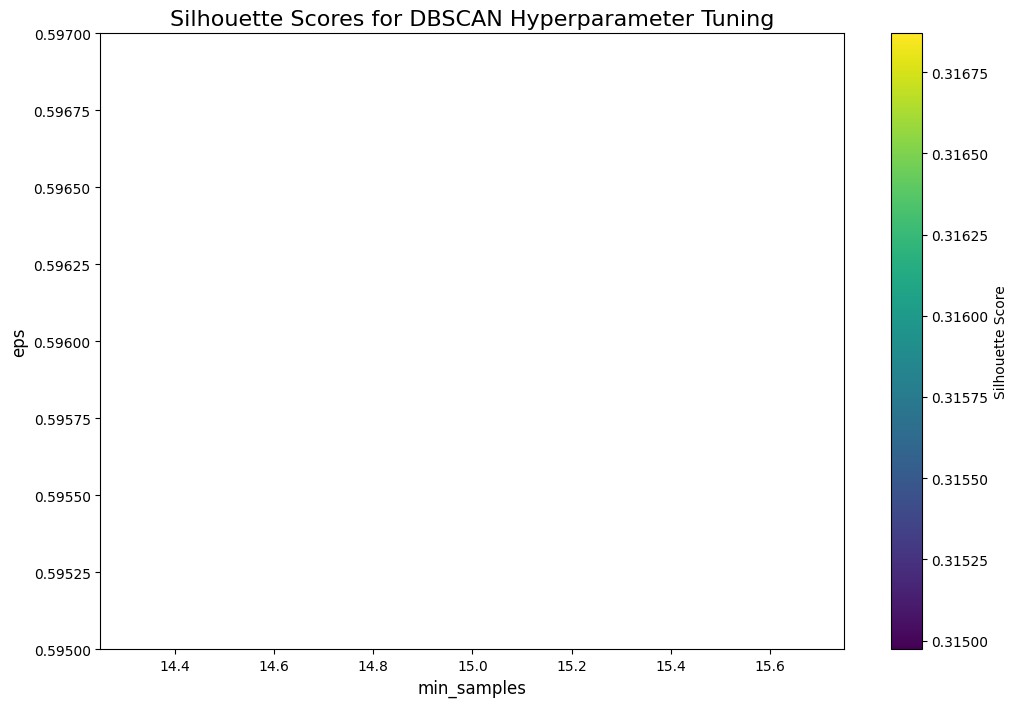

In [ ]:
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Step 2: Define ranges for eps and min_samples
eps_values = np.arange(0.595, 0.597, 0.0001)
min_samples_values = range(15, 16)

# Initialize storage for silhouette scores
heatmap_scores = np.full((len(eps_values), len(min_samples_values)), -1.0)

best_score = -1  # Initialize best silhouette score
best_params = None  # To store best parameters

# Step 3: Iterate over eps and min_samples
for i, eps in enumerate(eps_values):
    for j, min_samples in enumerate(min_samples_values):
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(
            X=data_scaled[:, :2],  # Assuming first two columns are coordinates
            sample_weight=data_scaled[:, 2]  # Third column is sample weights
        )

        # Ignore configurations with all points as noise
        if len(set(labels)) > 1:  # At least 2 clusters
            score = silhouette_score(data_scaled, labels)
            heatmap_scores[i, j] = score  # Store silhouette score
            print(f"eps: {eps}, min_samples: {min_samples}, silhouette score: {score}")

            # Update best parameters if current score is better
            if score > best_score:
                best_score = score
                best_params = (eps, min_samples)

# Step 4: Print best parameters
print(f"Best eps: {best_params[0]}, Best min_samples: {best_params[1]}, Best silhouette score: {best_score}")

# Step 5: Visualize the result as a heatmap
plt.figure(figsize=(12, 8))
plt.imshow(
    heatmap_scores,
    interpolation='nearest',
    cmap='viridis',
    aspect='auto',
    extent=[
        min(min_samples_values), max(min_samples_values),
        max(eps_values), min(eps_values)
    ]
)
plt.colorbar(label='Silhouette Score')
plt.title('Silhouette Scores for DBSCAN Hyperparameter Tuning', fontsize=16)
plt.xlabel('min_samples', fontsize=12)
plt.ylabel('eps', fontsize=12)
plt.gca().invert_yaxis()  # Ensure eps values decrease top to bottom
plt.show()

> Best eps: 0.5955999999999999, Best min_samples: 15, Best silhouette score: 0.3168692292135907

0.5956, 15 가 그나마 최선으로 보인다.

In [ ]:
df_foot_traffic_sample_for_tuning

,centroid_x,centroid_y,FLPOP_CO
0,127.029251,37.582033,63.420750
1,127.028785,37.581983,43.981500
2,127.029693,37.581905,86.643750
3,127.029384,37.581720,51.168600
4,127.028990,37.581781,44.571667
...,...,...,...
90638,127.066885,37.602360,102.002350
90639,127.066966,37.601810,89.574200
90640,127.065980,37.601678,79.077000
90641,127.062057,37.601619,36.715000


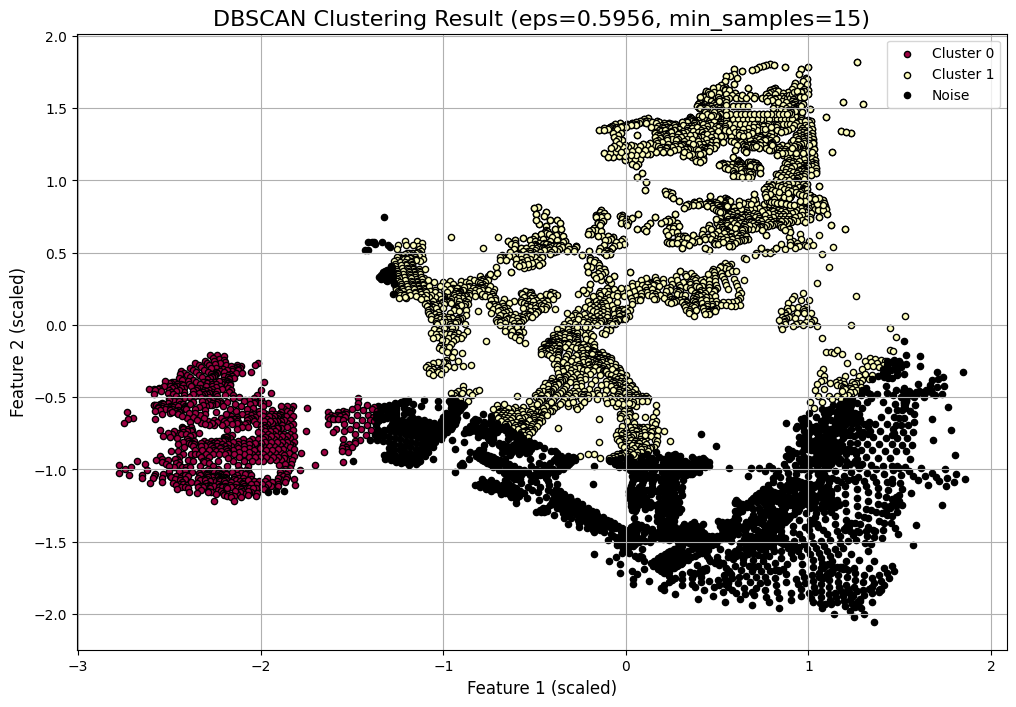

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Step 1: Scale the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df_foot_traffic_sample_for_tuning)

# Step 2: Apply DBSCAN with the selected hyperparameters
eps = 0.5956
min_samples = 15

dbscan = DBSCAN(eps=eps, min_samples=min_samples)
labels = dbscan.fit_predict(
  X=data_scaled[:, :2],
  sample_weight=data_scaled[:, 2]
)

# Step 3: Visualize the clustering results
# Identify unique cluster labels and noise
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

plt.figure(figsize=(12, 8))

for label, color in zip(unique_labels, colors):
    if label == -1:
        # Noise points
        color = [0, 0, 0, 1]  # Black for noise
        label_name = "Noise"
    else:
        label_name = f"Cluster {label}"

    # Mask data points for the current label
    class_members = (labels == label)
    xy = data_scaled[class_members, :2]  # Select first 2 columns for x, y

    # Plot points
    plt.scatter(
        xy[:, 0],
        xy[:, 1],
        c=[tuple(color)],
        label=label_name,
        edgecolor='k',
        s=20
    )

# Add titles, labels, and legend
plt.title(f'DBSCAN Clustering Result (eps={eps}, min_samples={min_samples})', fontsize=16)
plt.xlabel('Feature 1 (scaled)', fontsize=12)
plt.ylabel('Feature 2 (scaled)', fontsize=12)
plt.legend(loc='best', fontsize=10)
plt.grid(True)
plt.show()


그런데 잘 나온 silhouette score 를 기반으로 clustering 을 진행해 보면, 내가 생각한 것과는 양상이 좀 많이 다르다. 특히 유동인구라는 요소가 가중치로 고려가 되어서 그런게 아닐까 싶다.

'DBSCAN hyperparam 을 정하는 건 네 도메인 지식에 따라 다르다' 라는 이야기를 찾아보다가 확인한 적이 있는데 이제 그 이유를 알겠다.

'얼마나 되는 반경 안에 얼마나 모여야 군집으로 간주할 수 있을까?' 라는 걸 기계적으로 판단할 수는 있지만 그게 실제로 문제를 해결하는 과정에서 적절한 결과인지는 보고 판단해야 할 문제이다.  


유동인구까지 고려해서 1달치 데이터를 뽑아 돌렸더니 다음과 같은 결과를 얻을 수 있었다. 느낀 점은 k-means 보다는 더 적절한 clustering 방법론이라는 사실이다. 유동인구라는 가중치까지 고려가 된 군집을 볼 수 있으니깐.

일단은 이걸론 noise 를 제외한 각 cluster 의 plot 들의 위/경도를 이어 linestring 을 그리고 그걸 지도 위에 overlay 로 띄운 뒤, 인구밀도까지 고려된 군집 지역들은 이런 지역들이 존재한다 라는 걸 쉽게 보여주어 어디에 설치할지 개소 판단을 도울 수 있어 보인다.

그리고 outlier. scaling 처리를 하여 outlier 들까지도 안고가고 싶었지만 웬만해서는 안고갈 수가 없는 수준으로 유동인구들의 mean value 와 차이가 컸다. outlier 들은 따로 빼서 point 로 그리면 좋지 않을까? 라는 생각이 든다.

아래의 그림은 여러 조합으로 시도해 보던 도중, 내 육안으로 보았을 때 적정한 수준으로 잘 뭉쳐있는 경우였다. 0.05와 3의 조합이었다.

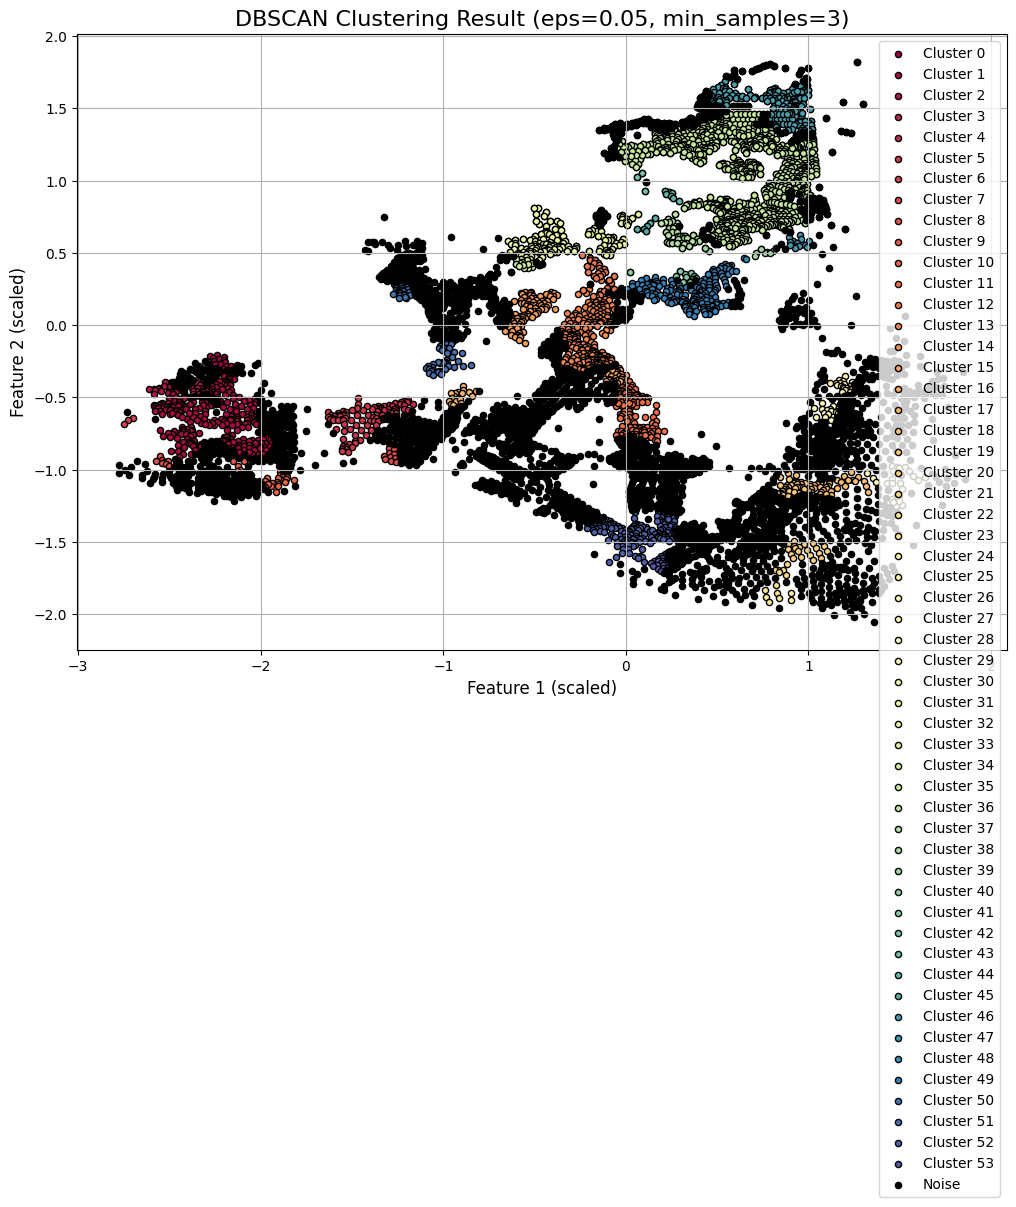

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Step 1: Scale the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df_foot_traffic_sample_for_tuning)

# Step 2: Apply DBSCAN with the selected hyperparameters
eps = 0.05
min_samples = 3

dbscan = DBSCAN(eps=eps, min_samples=min_samples)
labels = dbscan.fit_predict(
  X=data_scaled[:, :2],
  sample_weight=data_scaled[:, 2]
)

# Step 3: Visualize the clustering results
# Identify unique cluster labels and noise
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

plt.figure(figsize=(12, 8))

for label, color in zip(unique_labels, colors):
    if label == -1:
        # Noise points
        color = [0, 0, 0, 1]  # Black for noise
        label_name = "Noise"
    else:
        label_name = f"Cluster {label}"

    # Mask data points for the current label
    class_members = (labels == label)
    xy = data_scaled[class_members, :2]  # Select first 2 columns for x, y

    # Plot points
    plt.scatter(
        xy[:, 0],
        xy[:, 1],
        c=[tuple(color)],
        label=label_name,
        edgecolor='k',
        s=20
    )

# Add titles, labels, and legend
plt.title(f'DBSCAN Clustering Result (eps={eps}, min_samples={min_samples})', fontsize=16)
plt.xlabel('Feature 1 (scaled)', fontsize=12)
plt.ylabel('Feature 2 (scaled)', fontsize=12)
plt.legend(loc='best', fontsize=10)
plt.grid(True)
plt.show()


0.0501 부터 와 0.06까지, min_sample 을 3으로 고정하고 분석하면 어떤 결과가 나올까?

eps: 0.0501, min_samples: 3, silhouette score: -0.31419623025660304
eps: 0.0502, min_samples: 3, silhouette score: -0.3141127248616255
eps: 0.050300000000000004, min_samples: 3, silhouette score: -0.31387607192416894
eps: 0.05040000000000001, min_samples: 3, silhouette score: -0.31394685412796736
eps: 0.05050000000000001, min_samples: 3, silhouette score: -0.3142565997999459
eps: 0.05060000000000001, min_samples: 3, silhouette score: -0.3151716679343457
eps: 0.050700000000000016, min_samples: 3, silhouette score: -0.3185001640112184
eps: 0.05080000000000002, min_samples: 3, silhouette score: -0.3181250943039284
eps: 0.05090000000000002, min_samples: 3, silhouette score: -0.31693229334929646
eps: 0.051000000000000024, min_samples: 3, silhouette score: -0.3154357386050135
eps: 0.05110000000000003, min_samples: 3, silhouette score: -0.3151159085554484
eps: 0.05120000000000003, min_samples: 3, silhouette score: -0.3150404343891181
eps: 0.05130000000000003, min_samples: 3, silhouette score:

<ipython-input-22-4e3c7223570f>:41: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  plt.imshow(


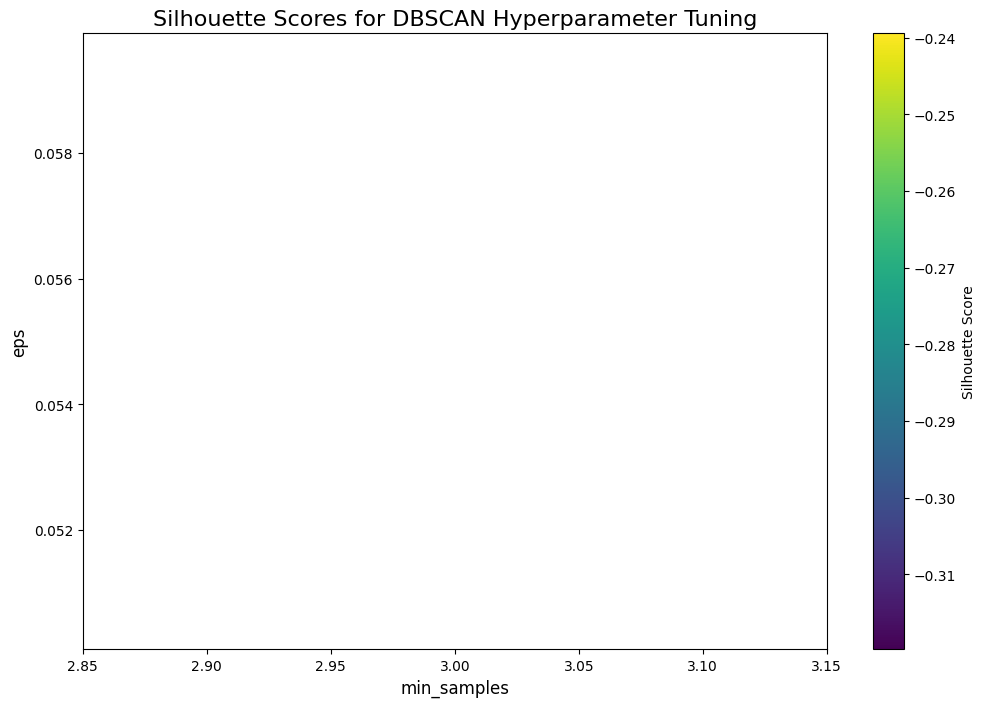

In [ ]:
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Step 2: Define ranges for eps and min_samples
eps_values = np.arange(0.0501, 0.06, 0.0001)
min_samples_values = range(3, 4)

# Initialize storage for silhouette scores
heatmap_scores = np.full((len(eps_values), len(min_samples_values)), -1.0)

best_score = -1  # Initialize best silhouette score
best_params = None  # To store best parameters

# Step 3: Iterate over eps and min_samples
for i, eps in enumerate(eps_values):
    for j, min_samples in enumerate(min_samples_values):
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(
            X=data_scaled[:, :2],  # Assuming first two columns are coordinates
            sample_weight=data_scaled[:, 2]  # Third column is sample weights
        )

        # Ignore configurations with all points as noise
        if len(set(labels)) > 1:  # At least 2 clusters
            score = silhouette_score(data_scaled, labels)
            heatmap_scores[i, j] = score  # Store silhouette score
            print(f"eps: {eps}, min_samples: {min_samples}, silhouette score: {score}")

            # Update best parameters if current score is better
            if score > best_score:
                best_score = score
                best_params = (eps, min_samples)

# Step 4: Print best parameters
print(f"Best eps: {best_params[0]}, Best min_samples: {best_params[1]}, Best silhouette score: {best_score}")

# Step 5: Visualize the result as a heatmap
plt.figure(figsize=(12, 8))
plt.imshow(
    heatmap_scores,
    interpolation='nearest',
    cmap='viridis',
    aspect='auto',
    extent=[
        min(min_samples_values), max(min_samples_values),
        max(eps_values), min(eps_values)
    ]
)
plt.colorbar(label='Silhouette Score')
plt.title('Silhouette Scores for DBSCAN Hyperparameter Tuning', fontsize=16)
plt.xlabel('min_samples', fontsize=12)
plt.ylabel('eps', fontsize=12)
plt.gca().invert_yaxis()  # Ensure eps values decrease top to bottom
plt.show()

noise dominated 된 상황인지라, -0.31 정도 silhouette score 가 나온다. 그리고 실제로도 noise 가 많긴 하다.

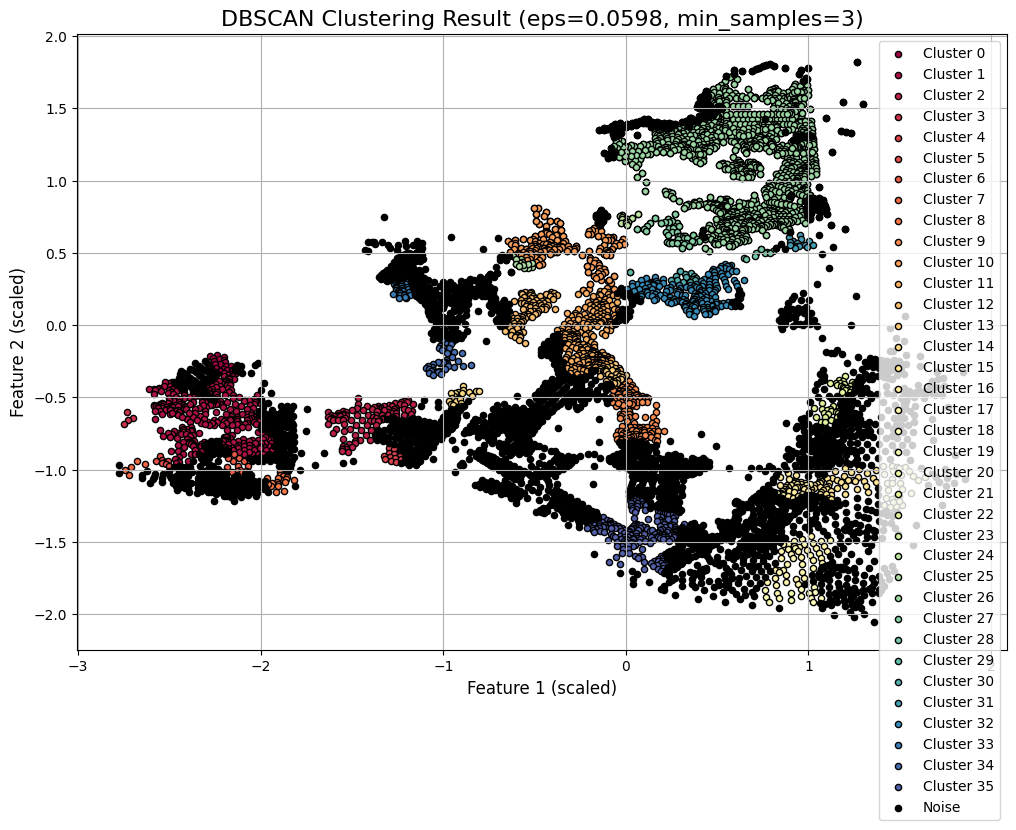

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Step 1: Scale the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df_foot_traffic_sample_for_tuning)

# Step 2: Apply DBSCAN with the selected hyperparameters
eps = 0.0598
min_samples = 3

dbscan = DBSCAN(eps=eps, min_samples=min_samples)
labels = dbscan.fit_predict(
  X=data_scaled[:, :2],
  sample_weight=data_scaled[:, 2]
)

# Step 3: Visualize the clustering results
# Identify unique cluster labels and noise
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

plt.figure(figsize=(12, 8))

for label, color in zip(unique_labels, colors):
    if label == -1:
        # Noise points
        color = [0, 0, 0, 1]  # Black for noise
        label_name = "Noise"
    else:
        label_name = f"Cluster {label}"

    # Mask data points for the current label
    class_members = (labels == label)
    xy = data_scaled[class_members, :2]  # Select first 2 columns for x, y

    # Plot points
    plt.scatter(
        xy[:, 0],
        xy[:, 1],
        c=[tuple(color)],
        label=label_name,
        edgecolor='k',
        s=20
    )

# Add titles, labels, and legend
plt.title(f'DBSCAN Clustering Result (eps={eps}, min_samples={min_samples})', fontsize=16)
plt.xlabel('Feature 1 (scaled)', fontsize=12)
plt.ylabel('Feature 2 (scaled)', fontsize=12)
plt.legend(loc='best', fontsize=10)
plt.grid(True)
plt.show()


해당 값으로 2016년 3월 데이터가 아니라, 가지고 있는 전체 데이터를 통해 clustering 을 진행한다면 어떤 결과가 나올까?

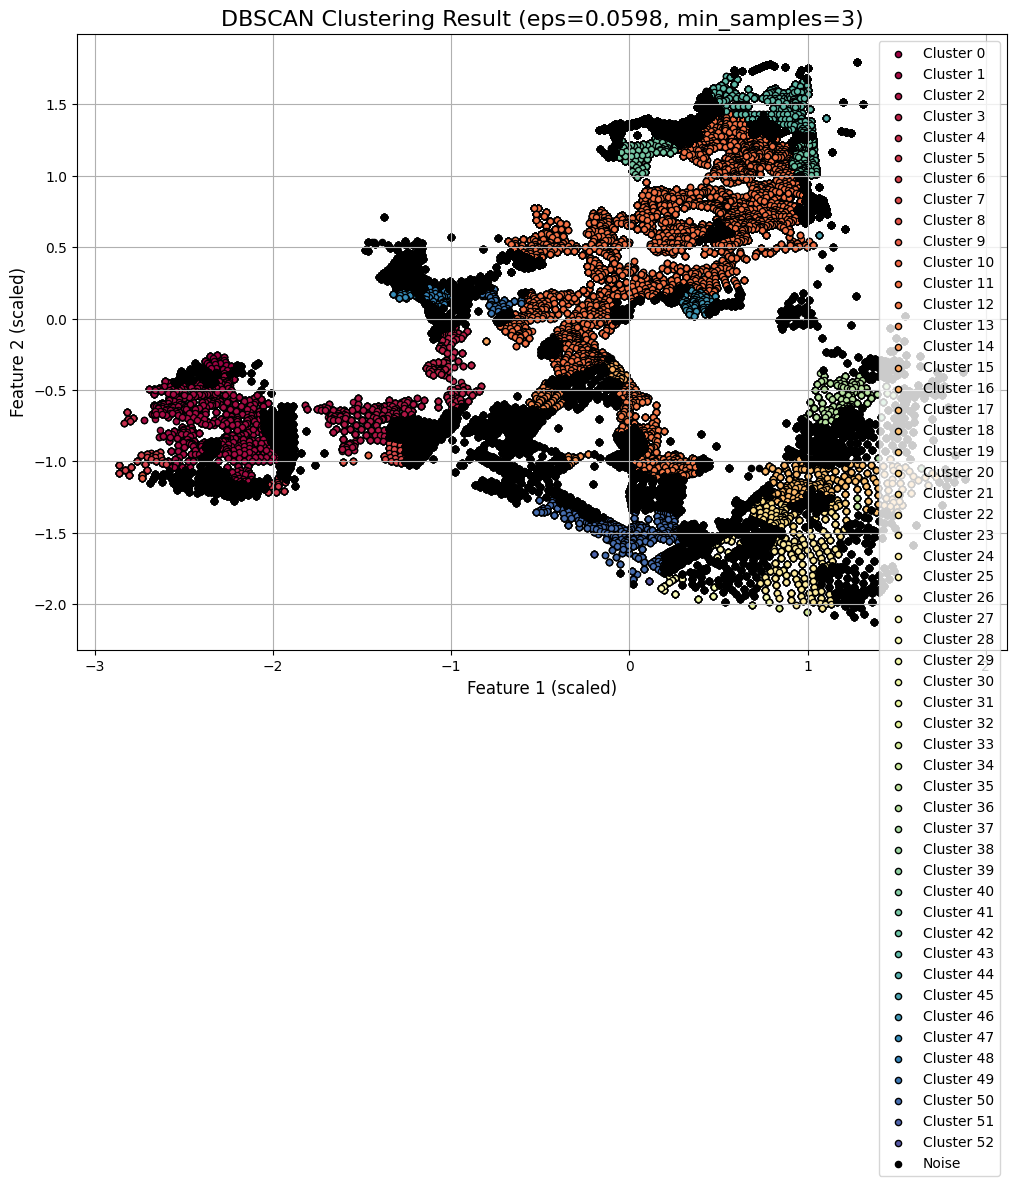

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Step 1: Scale the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df_foot_traffic_no_outliers)

# Step 2: Apply DBSCAN with the selected hyperparameters
eps = 0.0598
min_samples = 3

dbscan = DBSCAN(eps=eps, min_samples=min_samples)
labels = dbscan.fit_predict(
  X=data_scaled[:, :2],
  sample_weight=data_scaled[:, 2]
)

# Step 3: Visualize the clustering results
# Identify unique cluster labels and noise
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

plt.figure(figsize=(12, 8))

for label, color in zip(unique_labels, colors):
    if label == -1:
        # Noise points
        color = [0, 0, 0, 1]  # Black for noise
        label_name = "Noise"
    else:
        label_name = f"Cluster {label}"

    # Mask data points for the current label
    class_members = (labels == label)
    xy = data_scaled[class_members, :2]  # Select first 2 columns for x, y

    # Plot points
    plt.scatter(
        xy[:, 0],
        xy[:, 1],
        c=[tuple(color)],
        label=label_name,
        edgecolor='k',
        s=20
    )

# Add titles, labels, and legend
plt.title(f'DBSCAN Clustering Result (eps={eps}, min_samples={min_samples})', fontsize=16)
plt.xlabel('Feature 1 (scaled)', fontsize=12)
plt.ylabel('Feature 2 (scaled)', fontsize=12)
plt.legend(loc='best', fontsize=10)
plt.grid(True)
plt.show()


각 label 들 별로 convex hull 을 만들어서 시각화를 진행한다면 어떻게 될까?

In [ ]:
import numpy as np
import pandas as pd
import geopandas as gpd
from shapely.geometry import Polygon
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Step 3: Add cluster labels to the original DataFrame
df_foot_traffic_no_outliers['cluster'] = labels

<ipython-input-11-89b638064955>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_foot_traffic_no_outliers['cluster'] = labels


In [ ]:
df_foot_traffic_no_outliers

,centroid_x,centroid_y,FLPOP_CO,STDR_YM_CD,cluster
0,127.029251,37.582033,63.420750,201603,0
1,127.028785,37.581983,43.981500,201603,0
2,127.029693,37.581905,86.643750,201603,0
3,127.029384,37.581720,51.168600,201603,0
4,127.028990,37.581781,44.571667,201603,0
...,...,...,...,...,...
92269,127.066378,37.602380,4.420000,201609,43
92270,127.066622,37.602370,4.352000,201609,43
92271,127.066500,37.602289,5.372000,201609,43
92272,127.065943,37.602632,14.194400,201609,43


In [ ]:
cluster_rows = []

# Group by cluster to create LineString for each cluster
for cluster in df_foot_traffic_no_outliers['cluster'].unique():
    if cluster == -1:  # Skip noise
        continue

    cluster_data = df_foot_traffic_no_outliers[
      df_foot_traffic_no_outliers['cluster'] == cluster
    ]

    coords = list(zip(cluster_data['centroid_x'], cluster_data['centroid_y']))
    polygon = Polygon(coords).convex_hull

    cluster_rows.append({'cluster': cluster, 'geometry': polygon})

# Step 5: Create LineString geometries by cluster
gdf_clusters = gpd.GeoDataFrame(cluster_rows, columns=['cluster', 'geometry'])

In [ ]:
gdf_clusters

,cluster,geometry
0,0,"POLYGON ((127.02972 37.5806, 127.0292 37.58065..."
1,1,"POLYGON ((127.03102 37.57176, 127.03072 37.571..."
2,2,"POLYGON ((127.0377 37.5741, 127.03732 37.57417..."
3,3,"POLYGON ((127.04432 37.57766, 127.04349 37.577..."
4,4,"POLYGON ((127.02328 37.57645, 127.02347 37.577..."
5,5,"POLYGON ((127.03253 37.57087, 127.03256 37.571..."
6,7,"POLYGON ((127.04114 37.57322, 127.0408 37.5733..."
7,6,"POLYGON ((127.02357 37.57225, 127.02295 37.572..."
8,8,"LINESTRING (127.03803 37.57337, 127.03739 37.5..."
9,9,"LINESTRING (127.0244 37.57224, 127.02442 37.57..."


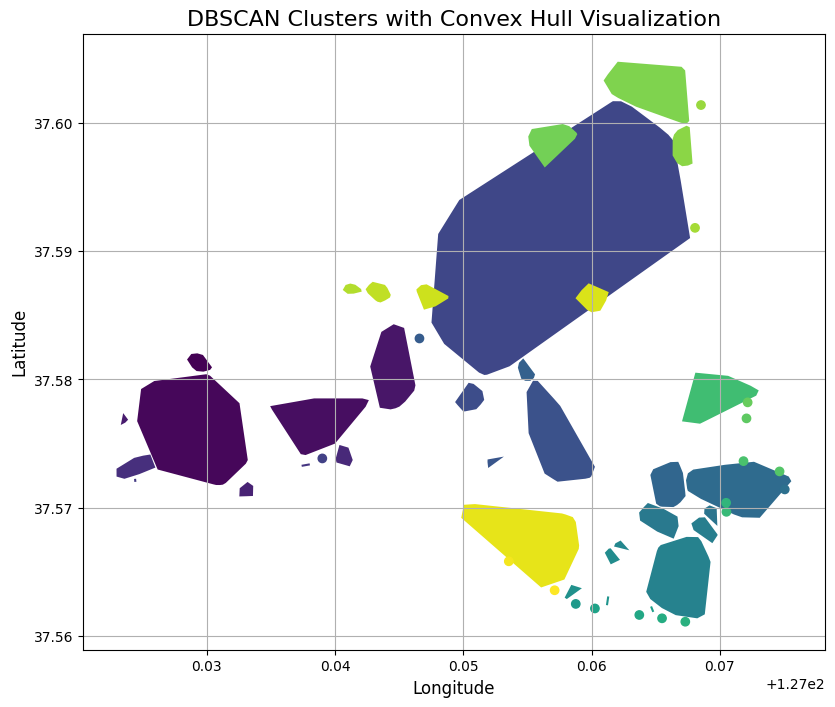

In [ ]:
# Step 6: Visualize the Convex hull geometries
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
gdf_clusters.plot(ax=ax, cmap='viridis', legend=True)
plt.title('DBSCAN Clusters with Convex Hull Visualization', fontsize=16)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.grid(True)
plt.show()

folium 으로 만든 지도 위에 해당 convex hull 들을 투사시켜 보자.

In [ ]:
!pip install folium

In [ ]:
df_foot_traffic_larger_than_q3_with_cluster_id

,centroid_x,centroid_y,FLPOP_CO,cluster_id
0,127.029251,37.582033,63.420750,-1
2,127.029693,37.581905,86.643750,-1
5,127.029736,37.581647,71.028500,-1
68,127.030015,37.580054,54.717000,-1
74,127.029919,37.579888,67.385333,-1
...,...,...,...,...
92245,127.062262,37.602997,80.143000,-1
92246,127.062856,37.603155,54.193667,-1
92247,127.062703,37.602992,55.441000,-1
92248,127.063009,37.602988,53.693500,-1


In [ ]:
import folium
from shapely.geometry import mapping

folium_map = folium.Map(location=[37.5665, 126.9780], tiles="OpenStreetMap", zoom_start=12)

for _, row in gdf_clusters.iterrows():
    cluster_label = row['cluster']
    polygon = row['geometry']

    geo_json = mapping(polygon)

    folium.GeoJson(
        geo_json,
        name=f"Cluster {cluster_label}",
        style_function=lambda x: {
            "fillColor": "#3186cc",
            "color": "blue",
            "weight": 2,
            "fillOpacity": 0.4,
        },
        tooltip=f"Cluster {cluster_label}"
    ).add_to(folium_map)

folium_map

회기동 쪽 클러스터가 너무 크게 뭉쳐있다. 1달치(201603) 데이터만 뽑아서 만든 클러스터를 투사시킨다면 어떤 형식으로 나올까?

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Step 1: Scale the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df_foot_traffic_no_outliers)

# Step 2: Apply DBSCAN with the selected hyperparameters
eps = 0.0598
min_samples = 3

dbscan = DBSCAN(eps=eps, min_samples=min_samples)
labels_sample_201603 = dbscan.fit_predict(
  X=data_scaled[:, :2],
  sample_weight=data_scaled[:, 2]
)


In [ ]:
# Step 3: Add cluster labels to the original DataFrame
df_foot_traffic_sample_for_tuning['cluster'] = labels

In [ ]:
df_foot_traffic_sample_for_tuning

,centroid_x,centroid_y,FLPOP_CO,cluster
0,127.029251,37.582033,63.420750,0
1,127.028785,37.581983,43.981500,0
2,127.029693,37.581905,86.643750,0
3,127.029384,37.581720,51.168600,0
4,127.028990,37.581781,44.571667,0
...,...,...,...,...
90638,127.066885,37.602360,102.002350,26
90639,127.066966,37.601810,89.574200,26
90640,127.065980,37.601678,79.077000,26
90641,127.062057,37.601619,36.715000,26


In [ ]:
from shapely.geometry import Polygon
from shapely.geometry import LineString

cluster_rows_sample = []

# Group by cluster to create LineString for each cluster
for cluster in df_foot_traffic_larger_than_q3_with_cluster_id['cluster'].unique():
    if cluster == -1:  # Skip noise
        continue

    cluster_data = df_foot_traffic_larger_than_q3_with_cluster_id[
      df_foot_traffic_larger_than_q3_with_cluster_id['cluster'] == cluster
    ]

    coords = list(zip(cluster_data['centroid_x'], cluster_data['centroid_y']))

    # check if enough coordinates for a polygon
    if len(coords) >= 3:
      polygon = Polygon(coords).convex_hull
      cluster_rows_sample.append({'cluster': cluster, 'geometry': polygon})

    # if not available, draw linestring instead
    else:
      linestring = LineString(coords)
      cluster_rows_sample.append({'cluster': cluster, 'geometry': linestring})

# Step 5: Create LineString geometries by cluster
gdf_clusters_sample = gpd.GeoDataFrame(cluster_rows_sample, columns=['cluster', 'geometry'])

In [ ]:
gdf_clusters_sample

,cluster,geometry
0,0,"POLYGON ((127.02967 37.5809, 127.02912 37.5812..."
1,1,"POLYGON ((127.02668 37.57349, 127.02628 37.574..."
2,3,"POLYGON ((127.02768 37.57883, 127.02759 37.579..."
3,2,"POLYGON ((127.02521 37.57884, 127.02487 37.579..."
4,4,"POLYGON ((127.03971 37.57727, 127.03955 37.577..."
5,5,"POLYGON ((127.0377 37.5741, 127.03732 37.57417..."
6,6,"POLYGON ((127.02328 37.57645, 127.0235 37.5767..."
7,7,"POLYGON ((127.0408 37.57332, 127.04045 37.5734..."
8,8,"POLYGON ((127.02616 37.57297, 127.02534 37.573..."
9,9,"POLYGON ((127.03056 37.57254, 127.03029 37.573..."


In [ ]:
# set CRS to 4326, compatible with WGS84
gdf_clusters_sample.set_crs(epsg=4326, inplace=True)

,cluster,geometry
0,0,"POLYGON ((127.02967 37.5809, 127.02912 37.5812..."
1,1,"POLYGON ((127.02668 37.57349, 127.02628 37.574..."
2,3,"POLYGON ((127.02768 37.57883, 127.02759 37.579..."
3,2,"POLYGON ((127.02521 37.57884, 127.02487 37.579..."
4,4,"POLYGON ((127.03971 37.57727, 127.03955 37.577..."
5,5,"POLYGON ((127.0377 37.5741, 127.03732 37.57417..."
6,6,"POLYGON ((127.02328 37.57645, 127.0235 37.5767..."
7,7,"POLYGON ((127.0408 37.57332, 127.04045 37.5734..."
8,8,"POLYGON ((127.02616 37.57297, 127.02534 37.573..."
9,9,"POLYGON ((127.03056 37.57254, 127.03029 37.573..."


In [ ]:
# save to .geojson file to data dir
gdf_clusters_sample.to_file(f'{dir_path}/dbscaned_foot_traffic_clusters.geojson', driver='GeoJSON')

In [ ]:
gdf_clusters.set_crs('EPSG:4326', inplace=True)

,cluster,geometry
0,0,"POLYGON ((127.04445 37.57836, 127.04339 37.578..."
1,1,"POLYGON ((127.03865 37.57755, 127.03794 37.577..."
2,2,"POLYGON ((127.03697 37.57713, 127.03507 37.577..."
3,3,"POLYGON ((127.02461 37.57316, 127.02407 37.573..."
4,4,"POLYGON ((127.03129 37.57501, 127.03061 37.575..."
5,6,"POLYGON ((127.0377 37.5741, 127.03734 37.57439..."
6,5,POINT (127.02233 37.57523)
7,7,POINT (127.02326 37.57505)
8,8,POINT (127.0229 37.5745)
9,10,"POLYGON ((127.03029 37.57338, 127.03033 37.573..."


In [ ]:
gdf_clusters.set_crs('EPSG:4326', inplace=True)

/usr/local/lib/python3.10/dist-packages/geopandas/geoseries.py:860: UserWarning: GeoSeries.notna() previously returned False for both missing (None) and empty geometries. Now, it only returns False for missing values. Since the calling GeoSeries contains empty geometries, the result has changed compared to previous versions of GeoPandas.
Given a GeoSeries 's', you can use '~s.is_empty & s.notna()' to get back the old behaviour.

To further ignore this warning, you can do: 
import warnings; warnings.filterwarnings('ignore', 'GeoSeries.notna', UserWarning)
  return self.notna()


,cluster,geometry
0,0,"POLYGON ((127.04617 37.57913, 127.04592 37.579..."
1,1,"POLYGON ((127.03865 37.57755, 127.03794 37.577..."
2,2,"POLYGON ((127.03676 37.57756, 127.03697 37.577..."
3,3,"POLYGON ((127.02461 37.57316, 127.02407 37.573..."
4,4,"POLYGON ((127.03192 37.57578, 127.03213 37.575..."
5,6,"POLYGON ((127.03734 37.57439, 127.03736 37.574..."
6,5,"LINESTRING (127.02233 37.57523, 127.02233 37.5..."
7,7,"LINESTRING (127.02326 37.57505, 127.02326 37.5..."
8,8,"LINESTRING (127.0229 37.5745, 127.0229 37.5745..."
9,10,"POLYGON ((127.03099 37.57394, 127.03098 37.573..."


In [ ]:
gdf_clusters

/usr/local/lib/python3.10/dist-packages/geopandas/geoseries.py:860: UserWarning: GeoSeries.notna() previously returned False for both missing (None) and empty geometries. Now, it only returns False for missing values. Since the calling GeoSeries contains empty geometries, the result has changed compared to previous versions of GeoPandas.
Given a GeoSeries 's', you can use '~s.is_empty & s.notna()' to get back the old behaviour.

To further ignore this warning, you can do: 
import warnings; warnings.filterwarnings('ignore', 'GeoSeries.notna', UserWarning)
  return self.notna()


,cluster,geometry
0,0,"POLYGON ((127.04617 37.57913, 127.04592 37.579..."
1,1,"POLYGON ((127.03865 37.57755, 127.03794 37.577..."
2,2,"POLYGON ((127.03676 37.57756, 127.03697 37.577..."
3,3,"POLYGON ((127.02461 37.57316, 127.02407 37.573..."
4,4,"POLYGON ((127.03192 37.57578, 127.03213 37.575..."
5,6,"POLYGON ((127.03734 37.57439, 127.03736 37.574..."
6,5,"LINESTRING (127.02233 37.57523, 127.02233 37.5..."
7,7,"LINESTRING (127.02326 37.57505, 127.02326 37.5..."
8,8,"LINESTRING (127.0229 37.5745, 127.0229 37.5745..."
9,10,"POLYGON ((127.03099 37.57394, 127.03098 37.573..."


In [ ]:
gdf_clusters = gdf_clusters[gdf_clusters.geometry.type != 'GeometryCollection']
gdf_clusters = gdf_clusters[~gdf_clusters.geometry.is_empty]

In [ ]:
gdf_clusters

,cluster,geometry
0,0,"POLYGON ((127.04617 37.57913, 127.04592 37.579..."
1,1,"POLYGON ((127.03865 37.57755, 127.03794 37.577..."
2,2,"POLYGON ((127.03676 37.57756, 127.03697 37.577..."
3,3,"POLYGON ((127.02461 37.57316, 127.02407 37.573..."
4,4,"POLYGON ((127.03192 37.57578, 127.03213 37.575..."
5,6,"POLYGON ((127.03734 37.57439, 127.03736 37.574..."
6,5,"LINESTRING (127.02233 37.57523, 127.02233 37.5..."
7,7,"LINESTRING (127.02326 37.57505, 127.02326 37.5..."
8,8,"LINESTRING (127.0229 37.5745, 127.0229 37.5745..."
9,10,"POLYGON ((127.03099 37.57394, 127.03098 37.573..."


In [ ]:
gdf_clusters.to_file(f'{dir_path}/dbscaned_foot_traffic_clusters_upper_than_3q.geojson', driver='GeoJSON')

In [ ]:
folium_map = folium.Map(location=[37.5665, 126.9780], tiles="OpenStreetMap", zoom_start=12)

for _, row in gdf_clusters.iterrows():
    cluster_label = row['cluster']
    geom = row['geometry']

    geo_json = mapping(geom)

    folium.GeoJson(
        geo_json,
        name=f"Cluster {cluster_label}",
        style_function=lambda x: {
            "fillColor": "#3186cc",
            "color": "blue",
            "weight": 2,
            "fillOpacity": 0.4,
        },
        tooltip=f"Cluster {cluster_label}"
    ).add_to(folium_map)

folium_map

1달치 데이터를 통해 그리는 경우 여전히 크게크게 나뉘어지긴 한다만 이전보다는 좀 낫다.
여기에 outlier 들을 point 로 그리고, 유동인구가 크면 클수록 큰 사이즈로 marker 를 표시한다면 어떻게 나올까?

In [ ]:
foot_traffic_values = df_foot_traffic_outliers_larger_than_upperbound['FLPOP_CO']

min_ft = foot_traffic_values.min()
max_ft = foot_traffic_values.max()

min_ft, max_ft

(120.254, 1160.992)

In [ ]:
foot_traffic_values = df_foot_traffic_outliers_larger_than_upperbound['FLPOP_CO']

min_ft = foot_traffic_values.min()
max_ft = foot_traffic_values.max()

for _, row in df_foot_traffic_outliers_larger_than_upperbound.iterrows():
  x = row['centroid_x']
  y = row['centroid_y']
  foot_traffic = row['FLPOP_CO']

  # Normalize the foot traffic values
  normalized_foot_traffic = (foot_traffic - min_ft) / (max_ft - min_ft)
  marker_size = normalized_foot_traffic * 20

  folium.CircleMarker(
      location=[y, x],
      radius=marker_size,
      color='green',
      fill=True,
      fill_color='green',
      fill_opacity=normalized_foot_traffic,
  ).add_to(folium_map)

folium_map

Output hidden; open in https://colab.research.google.com to view.